# DEMO

In [2]:
from qutip import *
import numpy as np 
import matplotlib.pyplot as plt
import math
from skimage.feature import peak_local_max
import pickle
import os
import glob

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

saveDir = 'peaks'

##  plot peaks

In [49]:
def routine(E_i,wd_i):
    
    print('running param set {} {}'.format(E_i, wd_i))
    
    # Define all the variables 
    kappa = 0.0012 # 0.0012 
    gJC = 0.3347 # 0.3347
    wc = 10.5665 # Cavity frequency/detuning 10.5665
    w0 = 8.1831 # Qubit frequency 8.1831
    gamma=0.0001 # 0.0001
    Emax =0.01 # 0.01
    EN=1
    #E = 0.01 #0.01(original) # Epsilon
    E = E_i
    N = 50 #50
    nloop = 1

    #wd = 10.6005 # Driving frequency (10.6005 original)
    wd = wd_i
    wlist = np.linspace(wd, wd,nloop)

    # Identity operators are defined for the space of the light field and the space of the atom

    ida = identity(N)
    idatom = identity(2)

    # Define cavity field and atomic operators

    a  = tensor(destroy(N),idatom)
    sm = tensor(ida,sigmam())

    # Hamiltonian # Reminder check hamiltonian from caltech paper

    H1= 1*gJC*(a.dag()*sm + sm.dag()*a) + 1*E*(a+a.dag())

    # Collapse Operators

    C1    = math.sqrt(kappa)*a
    C2    = math.sqrt(gamma)*sm

    C1dC1 = C1.dag()*C1
    C2dC2 = C2.dag()*C2

    # Calculate the Liouvillian

    L1 = spre(C1)*spost(C1.dag())-0.5*spre(C1dC1)-0.5*spost(C1dC1)
    L2 = spre(C2)*spost(C2.dag())-0.5*spre(C2dC2)-0.5*spost(C2dC2)
    L12  = L1+L2

    gQ=math.sqrt(4)
    xvec=  np.arange(-10,10.01,0.025) # 0.025
    yvec = np.arange(-10,10.01,0.025) 

    #print("epsilon", E)
    #print("and drive frequency", wd)
    #print("kappa", kappa)
    k=0
    while k < nloop :
        wl = wlist[k]    
        H = (w0-wl)*(sm.dag()*sm) + (wc-wl)*(a.dag()*a) + H1    
        LH = -complex(0,1) * (spre(H) - spost(H))
        L_final = LH + L12

        # Steady States

        rhoss = steadystate(L_final)
        rhosscav=ptrace(rhoss,0)
        rhocavsq=rhosscav*rhosscav
        k += 1

        #subplot(ceil(sqrt(nloop)), 
        #ceil(sqrt(nloop)), k)
    plt.rcParams['figure.figsize'] = (20.0, 16.0)
    fig, ax = plt.subplots()
    Q3 = qfunc(rhosscav,xvec,yvec,gQ)
    c = ax.contourf(xvec, yvec, np.real(Q3), 500, cmap=plt.cm.get_cmap('winter'))
    

#         ax.set_xlim([-3.5, 6]) # -3.5 to 6
#         ax.set_ylim([-4, 3])
    plt.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')
    


        #contour(xvec,yvec,real(Q3), 500)
        #plt.plot(xvec,yvec)
        #plt.show()
        #print(rhosscav)
        #print(rhoss)
    
    coordinates = peak_local_max(Q3)    
    for coord in coordinates:
        print('peak coords:{}'.format(coord))        
        coordHeight = Q3[coord[0], coord[1]]
        print('peak height:{}'.format(coordHeight))
        plt.plot(xvec[coord[1]], yvec[coord[0]], 'o', label='{}: {}'.format(coord, coordHeight))        
    plt.legend()
    plt.show()
    #print (Q3[coordinates])
    
#     newKey = len(savedInfo.keys()) + 1
    
#     infoPacket = {}
#     infoPacket['E_i'] = E_i
#     infoPacket['wd_i'] = wd_i
#     infoPacket['coors'] = coordinates
#     infoPacket['peaks'] = Q3[coordinates]
#     infoPacket['Q3'] = Q3
#     infoPacket['xvec'] = xvec
#     infoPacket['yvec'] = yvec
#     return infoPacket

## read peaks

In [ ]:
relevantInfo = []
for peak in glob.glob(os.path.join('/mnt/c/Users/manish/Documents/GitHub/qpeak/peaks/peaksOverview', '*')):
    savedInfo = pickle.load(open(peak, 'rb'))    
    
    coors = savedInfo['coors']    
#     peaks = []
#     for coor in coors:        
#         peaks.append(savedInfo['Q3'][coor[0], coor[1]])
    peaks = savedInfo['peaks']
        
    relevantInfo_i = {}
    relevantInfo_i['peakName'] = peak
    relevantInfo_i['E'] = savedInfo['E_i']
    relevantInfo_i['wd'] = savedInfo['wd_i']
    if savedInfo['wd_i'] <= 0:
        print(savedInfo['wd_i'])
        break
    
    relevantInfo_i['peaks'] = peaks
    relevantInfo_i['coors'] = coors
    relevantInfo.append(relevantInfo_i)
    print('E:{}, wd_i:{}, peaks:{}'.format(relevantInfo_i['E'], relevantInfo_i['wd'], relevantInfo_i['peaks']))
    
print(len(relevantInfo))

E:0.00125, wd_i:10.6095, peaks:[0.29469260394324304]
E:0.00125, wd_i:10.6095266332, peaks:[0.29262884604029366]
E:0.00125, wd_i:10.6097663317, peaks:[0.2680640466785742]
E:0.00125, wd_i:10.6121633166, peaks:[0.250748730323286]
E:0.00133793969849, wd_i:10.6095, peaks:[0.2769248946367265]
E:0.00212939698492, wd_i:10.6095, peaks:[0.18317763906004722]
E:0.00212939698492, wd_i:10.6095266332, peaks:[0.1843846144855691]
E:0.00212939698492, wd_i:10.6095532663, peaks:[0.18557522117838904]
E:0.00212939698492, wd_i:10.6095798995, peaks:[0.18673116673177614]
E:0.00212939698492, wd_i:10.6096065327, peaks:[0.18784285919096658]
E:0.00212939698492, wd_i:10.6096331658, peaks:[0.18893395402484064]
E:0.00212939698492, wd_i:10.609659799, peaks:[0.19000522971536715]
E:0.00212939698492, wd_i:10.6096864322, peaks:[0.19103673146196112]
E:0.00212939698492, wd_i:10.6097130653, peaks:[0.19206014766654436]
E:0.00212939698492, wd_i:10.6097396985, peaks:[0.1930605207790055]
E:0.00133793969849, wd_i:10.6095266332, p

E:0.00212939698492, wd_i:10.6123763819, peaks:[0.2692435182223829]
E:0.00212939698492, wd_i:10.6124030151, peaks:[0.26996852915052655]
E:0.00133793969849, wd_i:10.6097929648, peaks:[0.23464030242724981]
E:0.00212939698492, wd_i:10.6124296482, peaks:[0.27069085836298923]
E:0.00212939698492, wd_i:10.6124562814, peaks:[0.2714243635394516]
E:0.00212939698492, wd_i:10.6124829146, peaks:[0.2721343178674029]
E:0.00212939698492, wd_i:10.6125095477, peaks:[0.27283589644380485]
E:0.00212939698492, wd_i:10.6125361809, peaks:[0.2735693737442791]
E:0.00212939698492, wd_i:10.6125628141, peaks:[0.2742789225317976]
E:0.00212939698492, wd_i:10.6125894472, peaks:[0.2749858978179234]
E:0.00212939698492, wd_i:10.6126160804, peaks:[0.27570253648563925]
E:0.00212939698492, wd_i:10.6126427136, peaks:[0.2763948241136292]
E:0.00212939698492, wd_i:10.6126693467, peaks:[0.2770698772720696]
E:0.00133793969849, wd_i:10.609819598, peaks:[0.23025312180191798]
E:0.00212939698492, wd_i:10.6126959799, peaks:[0.27778535

E:0.00214698492462, wd_i:10.609979397, peaks:[0.20218435836611867]
E:0.00214698492462, wd_i:10.6100060302, peaks:[0.20301761834170037]
E:0.00133793969849, wd_i:10.6100859296, peaks:[0.18608734396804744]
E:0.00214698492462, wd_i:10.6100326633, peaks:[0.2038287975056861]
E:0.00214698492462, wd_i:10.6100592965, peaks:[0.20464928481031353]
E:0.00214698492462, wd_i:10.6100859296, peaks:[0.2054632652782659]
E:0.00214698492462, wd_i:10.6101125628, peaks:[0.20625641786811483]
E:0.00214698492462, wd_i:10.610139196, peaks:[0.2070311017545098]
E:0.00214698492462, wd_i:10.6101658291, peaks:[0.20783294642553088]
E:0.00214698492462, wd_i:10.6101924623, peaks:[0.20861458897537374]
E:0.00214698492462, wd_i:10.6102190955, peaks:[0.20941047425266085]
E:0.00214698492462, wd_i:10.6102457286, peaks:[0.21019855854989683]
E:0.00214698492462, wd_i:10.6102723618, peaks:[0.2109667078449044]
E:0.00133793969849, wd_i:10.6101125628, peaks:[0.18197521175067552]
E:0.00214698492462, wd_i:10.610298995, peaks:[0.211716

E:0.00214698492462, wd_i:10.6142673367, peaks:[0.30833274746276534]
E:0.00133793969849, wd_i:10.6105120603, peaks:[0.146059328615089, 0.13916521592792488]
E:0.00214698492462, wd_i:10.6142939698, peaks:[0.3086291950359749]
E:0.00214698492462, wd_i:10.614320603, peaks:[0.3089015368321046]
E:0.00214698492462, wd_i:10.6143472362, peaks:[0.3091833479428581]
E:0.00214698492462, wd_i:10.6143738693, peaks:[0.30944630026042014]
E:0.00214698492462, wd_i:10.6144005025, peaks:[0.30971429077995]
E:0.00214698492462, wd_i:10.6144271357, peaks:[0.3100047251860574]
E:0.00214698492462, wd_i:10.6144537688, peaks:[0.31027213857644337]
E:0.00214698492462, wd_i:10.614480402, peaks:[0.3105169104578933]
E:0.00214698492462, wd_i:10.6145070352, peaks:[0.3107394295729911]
E:0.00214698492462, wd_i:10.6145336683, peaks:[0.3109400930352389]
E:0.00133793969849, wd_i:10.6105386935, peaks:[0.14589486633508691, 0.14177383866119878]
E:0.00214698492462, wd_i:10.6145603015, peaks:[0.3111683907061415]
E:0.00214698492462, w

E:0.00216457286432, wd_i:10.6123763819, peaks:[0.26946566334250194]
E:0.00216457286432, wd_i:10.6124030151, peaks:[0.27018368593987185]
E:0.00133793969849, wd_i:10.6108582915, peaks:[0.1707196632994612]
E:0.00216457286432, wd_i:10.6124296482, peaks:[0.2709187402759446]
E:0.00216457286432, wd_i:10.6124562814, peaks:[0.2716551881710016]
E:0.00216457286432, wd_i:10.6124829146, peaks:[0.2723685157106966]
E:0.00216457286432, wd_i:10.6125095477, peaks:[0.27305850234346285]
E:0.00216457286432, wd_i:10.6125361809, peaks:[0.27372493975618734]
E:0.00216457286432, wd_i:10.6125628141, peaks:[0.2744169832036604]
E:0.00216457286432, wd_i:10.6125894472, peaks:[0.2751362169219115]
E:0.00216457286432, wd_i:10.6126160804, peaks:[0.2758576302842355]
E:0.00216457286432, wd_i:10.6126427136, peaks:[0.2765551378370212]
E:0.00216457286432, wd_i:10.6126693467, peaks:[0.2772285470054289]
E:0.00133793969849, wd_i:10.6108849246, peaks:[0.17294463373192717]
E:0.00216457286432, wd_i:10.6126959799, peaks:[0.27787767

E:0.00218216080402, wd_i:10.610139196, peaks:[0.20869208770607015]
E:0.00218216080402, wd_i:10.6101658291, peaks:[0.2094649957928539]
E:0.00218216080402, wd_i:10.6101924623, peaks:[0.21021867370980946]
E:0.00218216080402, wd_i:10.6102190955, peaks:[0.2109530982357617]
E:0.00218216080402, wd_i:10.6102457286, peaks:[0.21170051787503646]
E:0.00218216080402, wd_i:10.6102723618, peaks:[0.21244608811917567]
E:0.00133793969849, wd_i:10.6111778894, peaks:[0.19523967029350717]
E:0.00218216080402, wd_i:10.610298995, peaks:[0.21319604885952662]
E:0.00218216080402, wd_i:10.6103256281, peaks:[0.21395235410047492]
E:0.00218216080402, wd_i:10.6103522613, peaks:[0.21468986126682987]
E:0.00218216080402, wd_i:10.6103788945, peaks:[0.2154085567471556]
E:0.00218216080402, wd_i:10.6104055276, peaks:[0.21614111448895998]
E:0.00218216080402, wd_i:10.6104321608, peaks:[0.21686885363849343]
E:0.00218216080402, wd_i:10.610458794, peaks:[0.21757814249310667]
E:0.00218216080402, wd_i:10.6104854271, peaks:[0.21830

E:0.00218216080402, wd_i:10.6136547739, peaks:[0.2991768043397376]
E:0.00218216080402, wd_i:10.613681407, peaks:[0.2996392208581887]
E:0.00218216080402, wd_i:10.6137080402, peaks:[0.30014181892214503]
E:0.00218216080402, wd_i:10.6137346734, peaks:[0.30061716448538767]
E:0.00133793969849, wd_i:10.6115241206, peaks:[0.21714638068950423]
E:0.00218216080402, wd_i:10.6137613065, peaks:[0.3010653252744389]
E:0.00218216080402, wd_i:10.6137879397, peaks:[0.30148639037186176]
E:0.00218216080402, wd_i:10.6138145729, peaks:[0.3018804701162493]
E:0.00218216080402, wd_i:10.613841206, peaks:[0.30231314022096595]
E:0.00218216080402, wd_i:10.6138678392, peaks:[0.30276265166119204]
E:0.00218216080402, wd_i:10.6138944724, peaks:[0.3031986211517671]
E:0.00218216080402, wd_i:10.6139211055, peaks:[0.303607765861603]
E:0.00218216080402, wd_i:10.6139477387, peaks:[0.30399025410292524]
E:0.00218216080402, wd_i:10.6139743719, peaks:[0.3043462746043299]
E:0.00218216080402, wd_i:10.614001005, peaks:[0.3047523933

E:0.00219974874372, wd_i:10.6120301508, peaks:[0.26046096743470576]
E:0.00219974874372, wd_i:10.6120567839, peaks:[0.2611756198932079]
E:0.00219974874372, wd_i:10.6120834171, peaks:[0.2619027855837102]
E:0.00219974874372, wd_i:10.6121100503, peaks:[0.26260941539912447]
E:0.00219974874372, wd_i:10.6121366834, peaks:[0.2633386032657699]
E:0.00125, wd_i:10.6124030151, peaks:[0.26254440875758717]
E:0.00133793969849, wd_i:10.6118969849, peaks:[0.2383588030556144]
E:0.00219974874372, wd_i:10.6121633166, peaks:[0.2640724753523649]
E:0.00219974874372, wd_i:10.6121899497, peaks:[0.2647852899512484]
E:0.00219974874372, wd_i:10.6122165829, peaks:[0.2654920542989021]
E:0.00219974874372, wd_i:10.6122432161, peaks:[0.2662148406785258]
E:0.00219974874372, wd_i:10.6122698492, peaks:[0.26691604497636273]
E:0.00219974874372, wd_i:10.6122964824, peaks:[0.2676256385239521]
E:0.00219974874372, wd_i:10.6123231156, peaks:[0.2683531877639243]
E:0.00219974874372, wd_i:10.6123497487, peaks:[0.2690586814604103]


E:0.00221733668342, wd_i:10.6105919598, peaks:[0.22237863276959993]
E:0.00221733668342, wd_i:10.610618593, peaks:[0.22307324008122006]
E:0.00221733668342, wd_i:10.6106452261, peaks:[0.22376272913524956]
E:0.00221733668342, wd_i:10.6106718593, peaks:[0.2244706590239903]
E:0.00221733668342, wd_i:10.6106984925, peaks:[0.22516213368502888]
E:0.00221733668342, wd_i:10.6107251256, peaks:[0.22583719054302717]
E:0.00221733668342, wd_i:10.6107517588, peaks:[0.22654303186858857]
E:0.00221733668342, wd_i:10.610778392, peaks:[0.22724293800014247]
E:0.00221733668342, wd_i:10.6108050251, peaks:[0.22793585516496148]
E:0.00133793969849, wd_i:10.6122964824, peaks:[0.25834074562998005]
E:0.00221733668342, wd_i:10.6108316583, peaks:[0.22865107670835633]
E:0.00221733668342, wd_i:10.6108582915, peaks:[0.2293503953761282]
E:0.00221733668342, wd_i:10.6108849246, peaks:[0.23003373606672248]
E:0.00221733668342, wd_i:10.6109115578, peaks:[0.23071171368441054]
E:0.00221733668342, wd_i:10.610938191, peaks:[0.2314

E:0.00223492462312, wd_i:10.610618593, peaks:[0.22362774968153035]
E:0.00223492462312, wd_i:10.6106452261, peaks:[0.22432240855427826]
E:0.00223492462312, wd_i:10.6106718593, peaks:[0.22502649802190636]
E:0.00223492462312, wd_i:10.6106984925, peaks:[0.22571426808762957]
E:0.00223492462312, wd_i:10.6107251256, peaks:[0.2263857445120584]
E:0.00223492462312, wd_i:10.6107517588, peaks:[0.2270652018839185]
E:0.00223492462312, wd_i:10.610778392, peaks:[0.22775074974057913]
E:0.00223492462312, wd_i:10.6108050251, peaks:[0.2284448367455644]
E:0.00133793969849, wd_i:10.6128291457, peaks:[0.280883365290313]
E:0.00223492462312, wd_i:10.6108316583, peaks:[0.22915688206482784]
E:0.00223492462312, wd_i:10.6108582915, peaks:[0.2298531107757002]
E:0.00223492462312, wd_i:10.6108849246, peaks:[0.23053344519166413]
E:0.00223492462312, wd_i:10.6109115578, peaks:[0.2312169800877855]
E:0.00223492462312, wd_i:10.610938191, peaks:[0.23191241850947128]
E:0.00223492462312, wd_i:10.6109648241, peaks:[0.232591884

E:0.00225251256281, wd_i:10.610458794, peaks:[0.22007133976284873]
E:0.00225251256281, wd_i:10.6104854271, peaks:[0.22077282173708515]
E:0.00225251256281, wd_i:10.6105120603, peaks:[0.22147075928238288]
E:0.00225251256281, wd_i:10.6105386935, peaks:[0.22215171744438736]
E:0.00133793969849, wd_i:10.6133351759, peaks:[0.29814274040719624]
E:0.00225251256281, wd_i:10.6105653266, peaks:[0.2228157290219587]
E:0.00225251256281, wd_i:10.6105919598, peaks:[0.22350080616452872]
E:0.00225251256281, wd_i:10.610618593, peaks:[0.2241771707252527]
E:0.00225251256281, wd_i:10.6106452261, peaks:[0.2248606337470457]
E:0.00225251256281, wd_i:10.6106718593, peaks:[0.22556116445649307]
E:0.00225251256281, wd_i:10.6106984925, peaks:[0.22624550561611043]
E:0.00225251256281, wd_i:10.6107251256, peaks:[0.22691367209403523]
E:0.00225251256281, wd_i:10.6107517588, peaks:[0.2275989230651582]
E:0.00225251256281, wd_i:10.610778392, peaks:[0.2282814066714596]
E:0.00225251256281, wd_i:10.6108050251, peaks:[0.2289479

E:0.00227010050251, wd_i:10.6096864322, peaks:[0.1998093448387838]
E:0.00227010050251, wd_i:10.6097130653, peaks:[0.2005982042878191]
E:0.00227010050251, wd_i:10.6097396985, peaks:[0.20140373517653962]
E:0.00133793969849, wd_i:10.6137879397, peaks:[0.3081989137415977]
E:0.00227010050251, wd_i:10.6097663317, peaks:[0.2021847976437977]
E:0.00227010050251, wd_i:10.6097929648, peaks:[0.20294206658002814]
E:0.00227010050251, wd_i:10.609819598, peaks:[0.20368832737613632]
E:0.00227010050251, wd_i:10.6098462312, peaks:[0.2044448861502944]
E:0.00227010050251, wd_i:10.6098728643, peaks:[0.20518461458410617]
E:0.00227010050251, wd_i:10.6098994975, peaks:[0.20594283479377082]
E:0.00227010050251, wd_i:10.6099261307, peaks:[0.20668539214993928]
E:0.00227010050251, wd_i:10.6099527638, peaks:[0.20740827754861776]
E:0.00227010050251, wd_i:10.609979397, peaks:[0.20811868505901654]
E:0.00227010050251, wd_i:10.6100060302, peaks:[0.208847325198944]
E:0.00133793969849, wd_i:10.6138145729, peaks:[0.30864045

E:0.00227010050251, wd_i:10.614640201, peaks:[0.3112129081069696]
E:0.00227010050251, wd_i:10.6146668342, peaks:[0.3114192585585398]
E:0.00227010050251, wd_i:10.6146934673, peaks:[0.31161701658044416]
E:0.00227010050251, wd_i:10.6147201005, peaks:[0.31179515434473615]
E:0.00227010050251, wd_i:10.6147467337, peaks:[0.3120241787863464]
E:0.00227010050251, wd_i:10.6147733668, peaks:[0.312233900570491]
E:0.00227010050251, wd_i:10.6148, peaks:[0.3124246847488635]
E:0.00125, wd_i:10.6126427136, peaks:[0.27334878808247964]
E:0.00133793969849, wd_i:10.6142939698, peaks:[0.3139604649573828]
E:0.00228768844221, wd_i:10.6095, peaks:[0.19490872038158039]
E:0.00228768844221, wd_i:10.6095266332, peaks:[0.19577890633311354]
E:0.00228768844221, wd_i:10.6095532663, peaks:[0.19663738055446495]
E:0.00228768844221, wd_i:10.6095798995, peaks:[0.19749197512348887]
E:0.00228768844221, wd_i:10.6096065327, peaks:[0.19831894344344125]
E:0.00228768844221, wd_i:10.6096331658, peaks:[0.19911878031759003]
E:0.00228

E:0.00228768844221, wd_i:10.6128025126, peaks:[0.2808672606297604]
E:0.00228768844221, wd_i:10.6128291457, peaks:[0.2814752617599172]
E:0.00228768844221, wd_i:10.6128557789, peaks:[0.28210627337436445]
E:0.00228768844221, wd_i:10.6128824121, peaks:[0.28271754109737646]
E:0.00228768844221, wd_i:10.6129090452, peaks:[0.2833448489698697]
E:0.00228768844221, wd_i:10.6129356784, peaks:[0.2839829345171945]
E:0.00133793969849, wd_i:10.614640201, peaks:[0.3158874462026934]
E:0.00228768844221, wd_i:10.6129623116, peaks:[0.2845970126598595]
E:0.00228768844221, wd_i:10.6129889447, peaks:[0.28518694249141746]
E:0.00228768844221, wd_i:10.6130155779, peaks:[0.2857654426634512]
E:0.00228768844221, wd_i:10.6130422111, peaks:[0.2863566951572005]
E:0.00228768844221, wd_i:10.6130688442, peaks:[0.28696644625862383]
E:0.00228768844221, wd_i:10.6130954774, peaks:[0.2875842704066806]
E:0.00228768844221, wd_i:10.6131221106, peaks:[0.28817747396130583]
E:0.00228768844221, wd_i:10.6131487437, peaks:[0.288745930

E:0.00230527638191, wd_i:10.6116839196, peaks:[0.2527506932571562]
E:0.00230527638191, wd_i:10.6117105528, peaks:[0.2534412640324486]
E:0.00230527638191, wd_i:10.6117371859, peaks:[0.2541137823626192]
E:0.00230527638191, wd_i:10.6117638191, peaks:[0.25476806693194654]
E:0.00230527638191, wd_i:10.6117904523, peaks:[0.2554672259493152]
E:0.00230527638191, wd_i:10.6118170854, peaks:[0.25615271262265304]
E:0.00230527638191, wd_i:10.6118437186, peaks:[0.25686796911213344]
E:0.00230527638191, wd_i:10.6118703518, peaks:[0.2575647432056217]
E:0.00135552763819, wd_i:10.6097396985, peaks:[0.23666991824346406]
E:0.00230527638191, wd_i:10.6118969849, peaks:[0.25824282394773745]
E:0.00230527638191, wd_i:10.6119236181, peaks:[0.2589020004790712]
E:0.00230527638191, wd_i:10.6119502513, peaks:[0.25958625656060147]
E:0.00230527638191, wd_i:10.6119768844, peaks:[0.2602750778889981]
E:0.00230527638191, wd_i:10.6120035176, peaks:[0.26098430388100824]
E:0.00230527638191, wd_i:10.6120301508, peaks:[0.261684

E:0.00232286432161, wd_i:10.6108849246, peaks:[0.23286153771607726]
E:0.00232286432161, wd_i:10.6109115578, peaks:[0.23350187580218892]
E:0.00232286432161, wd_i:10.610938191, peaks:[0.2341560092519389]
E:0.00232286432161, wd_i:10.6109648241, peaks:[0.23482501515237825]
E:0.00232286432161, wd_i:10.6109914573, peaks:[0.23549072974382765]
E:0.00232286432161, wd_i:10.6110180905, peaks:[0.23617474454740478]
E:0.00232286432161, wd_i:10.6110447236, peaks:[0.23684296379319444]
E:0.00232286432161, wd_i:10.6110713568, peaks:[0.23749523123027927]
E:0.00135552763819, wd_i:10.6101924623, peaks:[0.16427063194201302, 0.10850273282570333]
E:0.00232286432161, wd_i:10.6110979899, peaks:[0.23813608441237333]
E:0.00232286432161, wd_i:10.6111246231, peaks:[0.23880937158946342]
E:0.00232286432161, wd_i:10.6111512563, peaks:[0.23947756644545484]
E:0.00232286432161, wd_i:10.6111778894, peaks:[0.2401737313828738]
E:0.00232286432161, wd_i:10.6112045226, peaks:[0.24085364655164934]
E:0.00232286432161, wd_i:10.61

E:0.00232286432161, wd_i:10.6146934673, peaks:[0.311383923873843]
E:0.00232286432161, wd_i:10.6147201005, peaks:[0.31159806382992283]
E:0.00232286432161, wd_i:10.6147467337, peaks:[0.3117928473137353]
E:0.00232286432161, wd_i:10.6147733668, peaks:[0.3119686272049741]
E:0.00232286432161, wd_i:10.6148, peaks:[0.3121462482039466]
E:0.00125, wd_i:10.6128025126, peaks:[0.2801739611975362]
E:0.00135552763819, wd_i:10.6105653266, peaks:[0.1476523782976058]
E:0.00234045226131, wd_i:10.6095, peaks:[0.1979403988337468]
E:0.00234045226131, wd_i:10.6095266332, peaks:[0.19873579260497742]
E:0.00234045226131, wd_i:10.6095532663, peaks:[0.19950593412742065]
E:0.00234045226131, wd_i:10.6095798995, peaks:[0.20028578414072462]
E:0.00234045226131, wd_i:10.6096065327, peaks:[0.20104783719320585]
E:0.00234045226131, wd_i:10.6096331658, peaks:[0.20180846299797656]
E:0.00234045226131, wd_i:10.609659799, peaks:[0.20257290849304416]
E:0.00234045226131, wd_i:10.6096864322, peaks:[0.20331451163101727]
E:0.002340

E:0.00234045226131, wd_i:10.6141075377, peaks:[0.30532842862263476]
E:0.00234045226131, wd_i:10.6141341709, peaks:[0.30567467511963553]
E:0.00234045226131, wd_i:10.614160804, peaks:[0.30599689511681905]
E:0.00234045226131, wd_i:10.6141874372, peaks:[0.3063096879087535]
E:0.00234045226131, wd_i:10.6142140704, peaks:[0.3066598942680215]
E:0.00234045226131, wd_i:10.6142407035, peaks:[0.3069865688622481]
E:0.00234045226131, wd_i:10.6142673367, peaks:[0.30728995465809006]
E:0.00135552763819, wd_i:10.6110447236, peaks:[0.18741224099120207]
E:0.00234045226131, wd_i:10.6142939698, peaks:[0.3075703081853333]
E:0.00234045226131, wd_i:10.614320603, peaks:[0.3078278989415363]
E:0.00234045226131, wd_i:10.6143472362, peaks:[0.30810828029363996]
E:0.00234045226131, wd_i:10.6143738693, peaks:[0.3084052214662453]
E:0.00234045226131, wd_i:10.6144005025, peaks:[0.30870543506962633]
E:0.00234045226131, wd_i:10.6144271357, peaks:[0.3089834023485298]
E:0.00234045226131, wd_i:10.6144537688, peaks:[0.30923942

E:0.00135552763819, wd_i:10.6114442211, peaks:[0.2133870998782819]
E:0.00235804020101, wd_i:10.6129623116, peaks:[0.2845919707067855]
E:0.00235804020101, wd_i:10.6129889447, peaks:[0.2851757017749038]
E:0.00235804020101, wd_i:10.6130155779, peaks:[0.2857759429436196]
E:0.00235804020101, wd_i:10.6130422111, peaks:[0.28638777979790603]
E:0.00235804020101, wd_i:10.6130688442, peaks:[0.28697588464178236]
E:0.00235804020101, wd_i:10.6130954774, peaks:[0.28754013340216505]
E:0.00235804020101, wd_i:10.6131221106, peaks:[0.2880804117374054]
E:0.00235804020101, wd_i:10.6131487437, peaks:[0.28864644833636083]
E:0.00235804020101, wd_i:10.6131753769, peaks:[0.289214107200238]
E:0.00235804020101, wd_i:10.6132020101, peaks:[0.2897721047079974]
E:0.00135552763819, wd_i:10.6114708543, peaks:[0.21493944657076075]
E:0.00235804020101, wd_i:10.6132286432, peaks:[0.2903392708982549]
E:0.00235804020101, wd_i:10.6132552764, peaks:[0.29088204047071803]
E:0.00235804020101, wd_i:10.6132819095, peaks:[0.29140031

E:0.0023756281407, wd_i:10.6109914573, peaks:[0.23671664321214725]
E:0.0023756281407, wd_i:10.6110180905, peaks:[0.23733574598811907]
E:0.0023756281407, wd_i:10.6110447236, peaks:[0.23799989963700574]
E:0.0023756281407, wd_i:10.6110713568, peaks:[0.23864889688410873]
E:0.00135552763819, wd_i:10.6117904523, peaks:[0.23309893340591503]
E:0.0023756281407, wd_i:10.6110979899, peaks:[0.23931098636632095]
E:0.0023756281407, wd_i:10.6111246231, peaks:[0.23997418929291728]
E:0.0023756281407, wd_i:10.6111512563, peaks:[0.2406213956582908]
E:0.0023756281407, wd_i:10.6111778894, peaks:[0.24125244279761743]
E:0.0023756281407, wd_i:10.6112045226, peaks:[0.2418976213405451]
E:0.0023756281407, wd_i:10.6112311558, peaks:[0.24255889581234755]
E:0.0023756281407, wd_i:10.6112577889, peaks:[0.2432194031941305]
E:0.0023756281407, wd_i:10.6112844221, peaks:[0.24389437425029067]
E:0.0023756281407, wd_i:10.6113110553, peaks:[0.2445528783472854]
E:0.0023756281407, wd_i:10.6113376884, peaks:[0.24519475059743695

E:0.0023756281407, wd_i:10.6146668342, peaks:[0.31090327820382074]
E:0.0023756281407, wd_i:10.6146934673, peaks:[0.3110967256412573]
E:0.0023756281407, wd_i:10.6147201005, peaks:[0.31131957299947366]
E:0.0023756281407, wd_i:10.6147467337, peaks:[0.31154952041483347]
E:0.0023756281407, wd_i:10.6147733668, peaks:[0.3117604016300981]
E:0.0023756281407, wd_i:10.6148, peaks:[0.3119525506119283]
E:0.00125, wd_i:10.6098462312, peaks:[0.2576253740401438]
E:0.00125, wd_i:10.6129623116, peaks:[0.2865183045871105]
E:0.00135552763819, wd_i:10.6121633166, peaks:[0.25234036693844175]
E:0.0023932160804, wd_i:10.6095, peaks:[0.2006262677607373]
E:0.0023932160804, wd_i:10.6095266332, peaks:[0.20135902501676117]
E:0.0023932160804, wd_i:10.6095532663, peaks:[0.2020963292858092]
E:0.0023932160804, wd_i:10.6095798995, peaks:[0.20283474033336726]
E:0.0023932160804, wd_i:10.6096065327, peaks:[0.20355152551961536]
E:0.0023932160804, wd_i:10.6096331658, peaks:[0.20424690513815258]
E:0.0023932160804, wd_i:10.60

E:0.0023932160804, wd_i:10.613361809, peaks:[0.29291278880503974]
E:0.0023932160804, wd_i:10.6133884422, peaks:[0.2934232509830108]
E:0.0023932160804, wd_i:10.6134150754, peaks:[0.2939523006692399]
E:0.0023932160804, wd_i:10.6134417085, peaks:[0.2944597764271108]
E:0.0023932160804, wd_i:10.6134683417, peaks:[0.29494267867815926]
E:0.00135552763819, wd_i:10.6125628141, peaks:[0.27012835942381475]
E:0.0023932160804, wd_i:10.6134949749, peaks:[0.2954273133688327]
E:0.0023932160804, wd_i:10.613521608, peaks:[0.29593770537030567]
E:0.0023932160804, wd_i:10.6135482412, peaks:[0.29642348343260944]
E:0.0023932160804, wd_i:10.6135748744, peaks:[0.2968846272370121]
E:0.0023932160804, wd_i:10.6136015075, peaks:[0.2973309204901874]
E:0.0023932160804, wd_i:10.6136281407, peaks:[0.29778658133450014]
E:0.0023932160804, wd_i:10.6136547739, peaks:[0.2982525994315838]
E:0.0023932160804, wd_i:10.613681407, peaks:[0.2987357114676079]
E:0.0023932160804, wd_i:10.6137080402, peaks:[0.2991940520192256]
E:0.00

E:0.0024108040201, wd_i:10.6120035176, peaks:[0.2621367098742516]
E:0.0024108040201, wd_i:10.6120301508, peaks:[0.262774416074034]
E:0.0024108040201, wd_i:10.6120567839, peaks:[0.2634170317639815]
E:0.0024108040201, wd_i:10.6120834171, peaks:[0.2640640541447312]
E:0.0024108040201, wd_i:10.6121100503, peaks:[0.26470817577675065]
E:0.0024108040201, wd_i:10.6121366834, peaks:[0.2653866400025402]
E:0.00125, wd_i:10.6130422111, peaks:[0.2895665083940204]
E:0.00135552763819, wd_i:10.6129623116, peaks:[0.28584329157819943]
E:0.0024108040201, wd_i:10.6121633166, peaks:[0.26604568275137247]
E:0.0024108040201, wd_i:10.6121899497, peaks:[0.26668509797743345]
E:0.0024108040201, wd_i:10.6122165829, peaks:[0.26730468491268644]
E:0.0024108040201, wd_i:10.6122432161, peaks:[0.26795010414641685]
E:0.0024108040201, wd_i:10.6122698492, peaks:[0.26858244110966656]
E:0.0024108040201, wd_i:10.6122964824, peaks:[0.2692607763152191]
E:0.0024108040201, wd_i:10.6123231156, peaks:[0.2699189130489986]
E:0.0024108

E:0.0024283919598, wd_i:10.610938191, peaks:[0.23658372204534106]
E:0.0024283919598, wd_i:10.6109648241, peaks:[0.2372317259050786]
E:0.0024283919598, wd_i:10.6109914573, peaks:[0.23786427869664836]
E:0.0024283919598, wd_i:10.6110180905, peaks:[0.23849154437390457]
E:0.0024283919598, wd_i:10.6110447236, peaks:[0.239137840805894]
E:0.0024283919598, wd_i:10.6110713568, peaks:[0.23976849424635616]
E:0.00135552763819, wd_i:10.6133884422, peaks:[0.29940430192032585]
E:0.0024283919598, wd_i:10.6110979899, peaks:[0.24038336095124765]
E:0.0024283919598, wd_i:10.6111246231, peaks:[0.24101941643683122]
E:0.0024283919598, wd_i:10.6111512563, peaks:[0.24166520782378081]
E:0.0024283919598, wd_i:10.6111778894, peaks:[0.24229504550526698]
E:0.0024283919598, wd_i:10.6112045226, peaks:[0.24294765439339744]
E:0.0024283919598, wd_i:10.6112311558, peaks:[0.24359070213057285]
E:0.0024283919598, wd_i:10.6112577889, peaks:[0.2442175337309736]
E:0.0024283919598, wd_i:10.6112844221, peaks:[0.24483625458106095]

E:0.00135552763819, wd_i:10.6137613065, peaks:[0.30751249056483476]
E:0.0024459798995, wd_i:10.6095, peaks:[0.20307937595948067]
E:0.0024459798995, wd_i:10.6095266332, peaks:[0.20376967768135826]
E:0.0024459798995, wd_i:10.6095532663, peaks:[0.2044398314581831]
E:0.0024459798995, wd_i:10.6095798995, peaks:[0.20512587529611154]
E:0.0024459798995, wd_i:10.6096065327, peaks:[0.20579706296205685]
E:0.0024459798995, wd_i:10.6096331658, peaks:[0.20644878023600507]
E:0.0024459798995, wd_i:10.609659799, peaks:[0.20711769481953446]
E:0.0024459798995, wd_i:10.6096864322, peaks:[0.2077827024434295]
E:0.0024459798995, wd_i:10.6097130653, peaks:[0.20842900830272476]
E:0.0024459798995, wd_i:10.6097396985, peaks:[0.20907992987758325]
E:0.00135552763819, wd_i:10.6137879397, peaks:[0.3079890646620405]
E:0.0024459798995, wd_i:10.6097663317, peaks:[0.20973103766995965]
E:0.0024459798995, wd_i:10.6097929648, peaks:[0.21036428952982544]
E:0.0024459798995, wd_i:10.609819598, peaks:[0.21097989357961078]
E:0.

E:0.0024459798995, wd_i:10.6125894472, peaks:[0.2763569894030629]
E:0.0024459798995, wd_i:10.6126160804, peaks:[0.27695818029074804]
E:0.0024459798995, wd_i:10.6126427136, peaks:[0.2775766632174152]
E:0.0024459798995, wd_i:10.6126693467, peaks:[0.27820819962017646]
E:0.00135552763819, wd_i:10.6140809045, peaks:[0.31193419458027966]
E:0.0024459798995, wd_i:10.6126959799, peaks:[0.2788181166385072]
E:0.0024459798995, wd_i:10.6127226131, peaks:[0.27940626507717686]
E:0.0024459798995, wd_i:10.6127492462, peaks:[0.2799725044410904]
E:0.0024459798995, wd_i:10.6127758794, peaks:[0.28055916916655144]
E:0.0024459798995, wd_i:10.6128025126, peaks:[0.28116506265006264]
E:0.0024459798995, wd_i:10.6128291457, peaks:[0.2817864453337451]
E:0.0024459798995, wd_i:10.6128557789, peaks:[0.28238563269951406]
E:0.0024459798995, wd_i:10.6128824121, peaks:[0.2829624899838641]
E:0.0024459798995, wd_i:10.6129090452, peaks:[0.2835168909979388]
E:0.0024459798995, wd_i:10.6129356784, peaks:[0.284072162204558]
E:0

E:0.0024635678392, wd_i:10.610938191, peaks:[0.23735034244235328]
E:0.0024635678392, wd_i:10.6109648241, peaks:[0.23796599695654794]
E:0.0024635678392, wd_i:10.6109914573, peaks:[0.23858022211517563]
E:0.0024635678392, wd_i:10.6110180905, peaks:[0.23920231329692765]
E:0.0024635678392, wd_i:10.6110447236, peaks:[0.2398479432677401]
E:0.0024635678392, wd_i:10.6110713568, peaks:[0.2404780468234463]
E:0.00135552763819, wd_i:10.6144537688, peaks:[0.3149401517648283]
E:0.0024635678392, wd_i:10.6110979899, peaks:[0.24109248272770215]
E:0.0024635678392, wd_i:10.6111246231, peaks:[0.24170168718597101]
E:0.0024635678392, wd_i:10.6111512563, peaks:[0.24232881532442815]
E:0.0024635678392, wd_i:10.6111778894, peaks:[0.24294003965645497]
E:0.0024635678392, wd_i:10.6112045226, peaks:[0.24359294871575077]
E:0.0024635678392, wd_i:10.6112311558, peaks:[0.24423600909921128]
E:0.0024635678392, wd_i:10.6112577889, peaks:[0.24486298842448317]
E:0.0024635678392, wd_i:10.6112844221, peaks:[0.24547373211500484

E:0.00248115577889, wd_i:10.6113110553, peaks:[0.24641488417541707]
E:0.00248115577889, wd_i:10.6113376884, peaks:[0.2470380433884066]
E:0.00137311557789, wd_i:10.6096864322, peaks:[0.23883710343991266]
E:0.00248115577889, wd_i:10.6113643216, peaks:[0.24764478090433875]
E:0.00248115577889, wd_i:10.6113909548, peaks:[0.2482918015829412]
E:0.00248115577889, wd_i:10.6114175879, peaks:[0.2489306927957386]
E:0.00248115577889, wd_i:10.6114442211, peaks:[0.24955298409806526]
E:0.00248115577889, wd_i:10.6114708543, peaks:[0.25017745035980593]
E:0.00248115577889, wd_i:10.6114974874, peaks:[0.2508112714182284]
E:0.00248115577889, wd_i:10.6115241206, peaks:[0.2514282516222418]
E:0.00248115577889, wd_i:10.6115507538, peaks:[0.2520617313903376]
E:0.00248115577889, wd_i:10.6115773869, peaks:[0.2527111768456758]
E:0.00248115577889, wd_i:10.6116040201, peaks:[0.253343605295228]
E:0.00137311557789, wd_i:10.6097130653, peaks:[0.23437173315144888]
E:0.00248115577889, wd_i:10.6116306533, peaks:[0.25395886

E:0.00249874371859, wd_i:10.6103788945, peaks:[0.22543383291708477]
E:0.00249874371859, wd_i:10.6104055276, peaks:[0.22602993944826463]
E:0.00249874371859, wd_i:10.6104321608, peaks:[0.226621647254007]
E:0.00249874371859, wd_i:10.610458794, peaks:[0.22723004358955187]
E:0.00249874371859, wd_i:10.6104854271, peaks:[0.22782322379845277]
E:0.00249874371859, wd_i:10.6105120603, peaks:[0.22840110266040672]
E:0.00249874371859, wd_i:10.6105386935, peaks:[0.22901947145893586]
E:0.00137311557789, wd_i:10.610139196, peaks:[0.16489853416870015, 0.10646762587767183]
E:0.00249874371859, wd_i:10.6105653266, peaks:[0.22962556758155397]
E:0.00249874371859, wd_i:10.6105919598, peaks:[0.2302164140323542]
E:0.00249874371859, wd_i:10.610618593, peaks:[0.23082932756214872]
E:0.00249874371859, wd_i:10.6106452261, peaks:[0.23143284958984014]
E:0.00249874371859, wd_i:10.6106718593, peaks:[0.23202111776731688]
E:0.00249874371859, wd_i:10.6106984925, peaks:[0.23261183137406388]
E:0.00249874371859, wd_i:10.61072

E:0.00249874371859, wd_i:10.613521608, peaks:[0.2956176588369792]
E:0.00249874371859, wd_i:10.6135482412, peaks:[0.2960738210538677]
E:0.00249874371859, wd_i:10.6135748744, peaks:[0.296506416131647]
E:0.00249874371859, wd_i:10.6136015075, peaks:[0.29694990582367076]
E:0.00249874371859, wd_i:10.6136281407, peaks:[0.29740599956584995]
E:0.00249874371859, wd_i:10.6136547739, peaks:[0.29788637120781597]
E:0.00249874371859, wd_i:10.613681407, peaks:[0.29834302936142165]
E:0.00249874371859, wd_i:10.6137080402, peaks:[0.2987759869220918]
E:0.00249874371859, wd_i:10.6137346734, peaks:[0.29918527088679525]
E:0.00137311557789, wd_i:10.610458794, peaks:[0.14074191350906878, 0.1411417188307432]
E:0.00249874371859, wd_i:10.6137613065, peaks:[0.29957218151039355]
E:0.00249874371859, wd_i:10.6137879397, peaks:[0.3000104432256604]
E:0.00249874371859, wd_i:10.6138145729, peaks:[0.30042514296143613]
E:0.00249874371859, wd_i:10.613841206, peaks:[0.30082907048485225]
E:0.00249874371859, wd_i:10.6138678392

E:0.00251633165829, wd_i:10.6120301508, peaks:[0.26380120535532703]
E:0.00251633165829, wd_i:10.6120567839, peaks:[0.2644073226351435]
E:0.00251633165829, wd_i:10.6120834171, peaks:[0.2650240496819966]
E:0.00251633165829, wd_i:10.6121100503, peaks:[0.2656627879070914]
E:0.00251633165829, wd_i:10.6121366834, peaks:[0.26628272463170555]
E:0.00125, wd_i:10.613361809, peaks:[0.2999137448244525]
E:0.00137311557789, wd_i:10.6108316583, peaks:[0.17318987275505673]
E:0.00251633165829, wd_i:10.6121633166, peaks:[0.2668923298289141]
E:0.00251633165829, wd_i:10.6121899497, peaks:[0.2675200946933396]
E:0.00251633165829, wd_i:10.6122165829, peaks:[0.26812868766133074]
E:0.00251633165829, wd_i:10.6122432161, peaks:[0.2687345682426079]
E:0.00251633165829, wd_i:10.6122698492, peaks:[0.2693755118950729]
E:0.00251633165829, wd_i:10.6122964824, peaks:[0.26999698093530133]
E:0.00251633165829, wd_i:10.6123231156, peaks:[0.27059879790013874]
E:0.00251633165829, wd_i:10.6123497487, peaks:[0.27119884049146253

E:0.00253391959799, wd_i:10.610938191, peaks:[0.23875626028396907]
E:0.00253391959799, wd_i:10.6109648241, peaks:[0.23938556448819656]
E:0.00253391959799, wd_i:10.6109914573, peaks:[0.23999965120332048]
E:0.00253391959799, wd_i:10.6110180905, peaks:[0.24059840039924416]
E:0.00253391959799, wd_i:10.6110447236, peaks:[0.24118169048830831]
E:0.00253391959799, wd_i:10.6110713568, peaks:[0.24179211478581072]
E:0.00137311557789, wd_i:10.6112577889, peaks:[0.20324713518565668]
E:0.00253391959799, wd_i:10.6110979899, peaks:[0.2423876391653275]
E:0.00253391959799, wd_i:10.6111246231, peaks:[0.2430007043667629]
E:0.00253391959799, wd_i:10.6111512563, peaks:[0.243628672404759]
E:0.00253391959799, wd_i:10.6111778894, peaks:[0.24424097383573964]
E:0.00253391959799, wd_i:10.6112045226, peaks:[0.24483746527772599]
E:0.00253391959799, wd_i:10.6112311558, peaks:[0.24543656088358304]
E:0.00253391959799, wd_i:10.6112577889, peaks:[0.2460447453758034]
E:0.00253391959799, wd_i:10.6112844221, peaks:[0.24664

E:0.00137311557789, wd_i:10.6116306533, peaks:[0.22497955848366263]
E:0.00255150753769, wd_i:10.6095, peaks:[0.20731075414339978]
E:0.00255150753769, wd_i:10.6095266332, peaks:[0.2079308494336736]
E:0.00255150753769, wd_i:10.6095532663, peaks:[0.2085338340590315]
E:0.00255150753769, wd_i:10.6095798995, peaks:[0.2091528897776357]
E:0.00255150753769, wd_i:10.6096065327, peaks:[0.20976195554567123]
E:0.00255150753769, wd_i:10.6096331658, peaks:[0.21035422371307058]
E:0.00255150753769, wd_i:10.609659799, peaks:[0.2109441215532718]
E:0.00255150753769, wd_i:10.6096864322, peaks:[0.21155609534823056]
E:0.00255150753769, wd_i:10.6097130653, peaks:[0.2121516549226626]
E:0.00255150753769, wd_i:10.6097396985, peaks:[0.2127475430169713]
E:0.00137311557789, wd_i:10.6116572864, peaks:[0.22646173210152368]
E:0.00255150753769, wd_i:10.6097663317, peaks:[0.21335119620161294]
E:0.00255150753769, wd_i:10.6097929648, peaks:[0.21393884958952863]
E:0.00255150753769, wd_i:10.609819598, peaks:[0.2145105802806

E:0.00255150753769, wd_i:10.6128557789, peaks:[0.28254261222707455]
E:0.00255150753769, wd_i:10.6128824121, peaks:[0.28307313931685807]
E:0.00255150753769, wd_i:10.6129090452, peaks:[0.28361393236185783]
E:0.00255150753769, wd_i:10.6129356784, peaks:[0.28417534737117056]
E:0.00137311557789, wd_i:10.6119768844, peaks:[0.24349643477794855]
E:0.00255150753769, wd_i:10.6129623116, peaks:[0.28475855487519924]
E:0.00255150753769, wd_i:10.6129889447, peaks:[0.2853216194683365]
E:0.00255150753769, wd_i:10.6130155779, peaks:[0.28586276076378114]
E:0.00255150753769, wd_i:10.6130422111, peaks:[0.2863818761040944]
E:0.00255150753769, wd_i:10.6130688442, peaks:[0.2869091760708023]
E:0.00255150753769, wd_i:10.6130954774, peaks:[0.2874590726978297]
E:0.00255150753769, wd_i:10.6131221106, peaks:[0.28798679553229767]
E:0.00255150753769, wd_i:10.6131487437, peaks:[0.2885165105289058]
E:0.00255150753769, wd_i:10.6131753769, peaks:[0.2890437843547844]
E:0.00255150753769, wd_i:10.6132020101, peaks:[0.28954

E:0.00256909547739, wd_i:10.6105919598, peaks:[0.23183012884499177]
E:0.00256909547739, wd_i:10.610618593, peaks:[0.23238681673855074]
E:0.00256909547739, wd_i:10.6106452261, peaks:[0.2329882267191197]
E:0.00256909547739, wd_i:10.6106718593, peaks:[0.2335749255447321]
E:0.00256909547739, wd_i:10.6106984925, peaks:[0.23416214132532004]
E:0.00256909547739, wd_i:10.6107251256, peaks:[0.23476138583681616]
E:0.00256909547739, wd_i:10.6107517588, peaks:[0.23534562200157638]
E:0.00256909547739, wd_i:10.610778392, peaks:[0.2359147714559579]
E:0.00256909547739, wd_i:10.6108050251, peaks:[0.23649231443714158]
E:0.00137311557789, wd_i:10.6122964824, peaks:[0.25875121255111205]
E:0.00256909547739, wd_i:10.6108316583, peaks:[0.23709255265609405]
E:0.00256909547739, wd_i:10.6108582915, peaks:[0.23767772271824772]
E:0.00256909547739, wd_i:10.6108849246, peaks:[0.238284560002857]
E:0.00256909547739, wd_i:10.6109115578, peaks:[0.2388824148080378]
E:0.00256909547739, wd_i:10.610938191, peaks:[0.23946509

E:0.00256909547739, wd_i:10.6145603015, peaks:[0.30916474011118733]
E:0.00256909547739, wd_i:10.6145869347, peaks:[0.3093899546200747]
E:0.00256909547739, wd_i:10.6146135678, peaks:[0.3095956856040503]
E:0.00256909547739, wd_i:10.614640201, peaks:[0.30981919131990976]
E:0.00256909547739, wd_i:10.6146668342, peaks:[0.31005754700892757]
E:0.00256909547739, wd_i:10.6146934673, peaks:[0.31027692721272354]
E:0.00256909547739, wd_i:10.6147201005, peaks:[0.31047760576759786]
E:0.00256909547739, wd_i:10.6147467337, peaks:[0.3106877908393885]
E:0.00256909547739, wd_i:10.6147733668, peaks:[0.31088087322587005]
E:0.00256909547739, wd_i:10.6148, peaks:[0.3110701459155296]
E:0.00125, wd_i:10.6135482412, peaks:[0.3046261421021532]
E:0.00137311557789, wd_i:10.6126959799, peaks:[0.27561403542198515]
E:0.00258668341709, wd_i:10.6095, peaks:[0.20856184016877008]
E:0.00258668341709, wd_i:10.6095266332, peaks:[0.20915494836940135]
E:0.00258668341709, wd_i:10.6095532663, peaks:[0.20974086135931286]
E:0.002

E:0.00137311557789, wd_i:10.6131753769, peaks:[0.2929785414406696]
E:0.00258668341709, wd_i:10.6142939698, peaks:[0.30637462843083835]
E:0.00258668341709, wd_i:10.614320603, peaks:[0.30663609070868814]
E:0.00258668341709, wd_i:10.6143472362, peaks:[0.306927716963841]
E:0.00258668341709, wd_i:10.6143738693, peaks:[0.3072206387757803]
E:0.00258668341709, wd_i:10.6144005025, peaks:[0.3075000106668797]
E:0.00258668341709, wd_i:10.6144271357, peaks:[0.30778448310044104]
E:0.00258668341709, wd_i:10.6144537688, peaks:[0.3080483005267434]
E:0.00258668341709, wd_i:10.614480402, peaks:[0.30829169433334946]
E:0.00258668341709, wd_i:10.6145070352, peaks:[0.3085556126799985]
E:0.00258668341709, wd_i:10.6145336683, peaks:[0.3088310983806927]
E:0.00137311557789, wd_i:10.6132020101, peaks:[0.29382665988064827]
E:0.00258668341709, wd_i:10.6145603015, peaks:[0.30908662228615563]
E:0.00258668341709, wd_i:10.6145869347, peaks:[0.30932243234192475]
E:0.00258668341709, wd_i:10.6146135678, peaks:[0.309538784

E:0.00260427135678, wd_i:10.6129356784, peaks:[0.28425187409308283]
E:0.00137311557789, wd_i:10.6135748744, peaks:[0.3037363681572137]
E:0.00260427135678, wd_i:10.6129623116, peaks:[0.28477666733608864]
E:0.00260427135678, wd_i:10.6129889447, peaks:[0.28532739604273927]
E:0.00260427135678, wd_i:10.6130155779, peaks:[0.2858840723562899]
E:0.00260427135678, wd_i:10.6130422111, peaks:[0.28641917893171487]
E:0.00260427135678, wd_i:10.6130688442, peaks:[0.2869326200258016]
E:0.00260427135678, wd_i:10.6130954774, peaks:[0.2874243081488564]
E:0.00260427135678, wd_i:10.6131221106, peaks:[0.2879280301705571]
E:0.00260427135678, wd_i:10.6131487437, peaks:[0.28846759931104443]
E:0.00260427135678, wd_i:10.6131753769, peaks:[0.2890121717121524]
E:0.00260427135678, wd_i:10.6132020101, peaks:[0.28953474772613697]
E:0.00137311557789, wd_i:10.6136015075, peaks:[0.304272269354405]
E:0.00260427135678, wd_i:10.6132286432, peaks:[0.29003524641911593]
E:0.00260427135678, wd_i:10.6132552764, peaks:[0.2905135

E:0.00262185929648, wd_i:10.610938191, peaks:[0.24044252156371584]
E:0.00262185929648, wd_i:10.6109648241, peaks:[0.24101146021289457]
E:0.00262185929648, wd_i:10.6109914573, peaks:[0.24160431302612767]
E:0.00262185929648, wd_i:10.6110180905, peaks:[0.24218510265310494]
E:0.00262185929648, wd_i:10.6110447236, peaks:[0.2427505961066519]
E:0.00262185929648, wd_i:10.6110713568, peaks:[0.24334216531312178]
E:0.00137311557789, wd_i:10.6139211055, peaks:[0.3097847489771795]
E:0.00262185929648, wd_i:10.6110979899, peaks:[0.24394063248356873]
E:0.00262185929648, wd_i:10.6111246231, peaks:[0.24452370078340283]
E:0.00262185929648, wd_i:10.6111512563, peaks:[0.24510273183725653]
E:0.00262185929648, wd_i:10.6111778894, peaks:[0.24569719950041743]
E:0.00262185929648, wd_i:10.6112045226, peaks:[0.2462760521720754]
E:0.00262185929648, wd_i:10.6112311558, peaks:[0.2468518700017838]
E:0.00262185929648, wd_i:10.6112577889, peaks:[0.24746412710116988]
E:0.00262185929648, wd_i:10.6112844221, peaks:[0.2480

E:0.00263944723618, wd_i:10.6105919598, peaks:[0.23332195402361133]
E:0.00263944723618, wd_i:10.610618593, peaks:[0.23389090961988282]
E:0.00263944723618, wd_i:10.6106452261, peaks:[0.23447427685837346]
E:0.00263944723618, wd_i:10.6106718593, peaks:[0.23504284947945853]
E:0.00263944723618, wd_i:10.6106984925, peaks:[0.23559654434326074]
E:0.00263944723618, wd_i:10.6107251256, peaks:[0.23614492872613688]
E:0.00263944723618, wd_i:10.6107517588, peaks:[0.23673003259124745]
E:0.00263944723618, wd_i:10.610778392, peaks:[0.2373002711440153]
E:0.00263944723618, wd_i:10.6108050251, peaks:[0.23788548148875902]
E:0.00137311557789, wd_i:10.6144271357, peaks:[0.31466223227549855]
E:0.00263944723618, wd_i:10.6108316583, peaks:[0.23846783387264037]
E:0.00263944723618, wd_i:10.6108582915, peaks:[0.23903522756733814]
E:0.00263944723618, wd_i:10.6108849246, peaks:[0.23958757104850542]
E:0.00263944723618, wd_i:10.6109115578, peaks:[0.24016148545625712]
E:0.00263944723618, wd_i:10.610938191, peaks:[0.240

E:0.00263944723618, wd_i:10.6144271357, peaks:[0.30752318716137067]
E:0.00263944723618, wd_i:10.6144537688, peaks:[0.3078177222216643]
E:0.00263944723618, wd_i:10.614480402, peaks:[0.30809199539046517]
E:0.00263944723618, wd_i:10.6145070352, peaks:[0.3083462262718752]
E:0.00263944723618, wd_i:10.6145336683, peaks:[0.3085806433977238]
E:0.00137311557789, wd_i:10.6148, peaks:[0.31635554049460207]
E:0.00263944723618, wd_i:10.6145603015, peaks:[0.3088082228922509]
E:0.00263944723618, wd_i:10.6145869347, peaks:[0.30907529222945057]
E:0.00263944723618, wd_i:10.6146135678, peaks:[0.30932299534527363]
E:0.00263944723618, wd_i:10.614640201, peaks:[0.30955157515029724]
E:0.00263944723618, wd_i:10.6146668342, peaks:[0.3097612818484407]
E:0.00263944723618, wd_i:10.6146934673, peaks:[0.3099523725021596]
E:0.00263944723618, wd_i:10.6147201005, peaks:[0.31014265819567866]
E:0.00263944723618, wd_i:10.6147467337, peaks:[0.3103676449250929]
E:0.00263944723618, wd_i:10.6147733668, peaks:[0.31060272179550

E:0.00265703517588, wd_i:10.6131487437, peaks:[0.28846598208886304]
E:0.00265703517588, wd_i:10.6131753769, peaks:[0.28895236697586435]
E:0.00265703517588, wd_i:10.6132020101, peaks:[0.2894653491737772]
E:0.00139070351759, wd_i:10.6098728643, peaks:[0.19976736762616454]
E:0.00265703517588, wd_i:10.6132286432, peaks:[0.2899838412628464]
E:0.00265703517588, wd_i:10.6132552764, peaks:[0.29048063500495463]
E:0.00265703517588, wd_i:10.6132819095, peaks:[0.2909556644640102]
E:0.00265703517588, wd_i:10.6133085427, peaks:[0.29140887266580656]
E:0.00265703517588, wd_i:10.6133351759, peaks:[0.29187361235552733]
E:0.00265703517588, wd_i:10.613361809, peaks:[0.29237452792497926]
E:0.00265703517588, wd_i:10.6133884422, peaks:[0.29287896282671383]
E:0.00265703517588, wd_i:10.6134150754, peaks:[0.29336136691614006]
E:0.00265703517588, wd_i:10.6134417085, peaks:[0.29382169456051993]
E:0.00265703517588, wd_i:10.6134683417, peaks:[0.2942599101819924]
E:0.00139070351759, wd_i:10.6098994975, peaks:[0.1952

E:0.00267462311558, wd_i:10.6114974874, peaks:[0.25346419134866854]
E:0.00267462311558, wd_i:10.6115241206, peaks:[0.25407129536216694]
E:0.00267462311558, wd_i:10.6115507538, peaks:[0.25466206724028634]
E:0.00267462311558, wd_i:10.6115773869, peaks:[0.25523637426961215]
E:0.00267462311558, wd_i:10.6116040201, peaks:[0.255794087234242]
E:0.00139070351759, wd_i:10.6102457286, peaks:[0.14706231184948132, 0.12309063828086808]
E:0.00267462311558, wd_i:10.6116306533, peaks:[0.25638001950823563]
E:0.00267462311558, wd_i:10.6116572864, peaks:[0.25697182729642004]
E:0.00267462311558, wd_i:10.6116839196, peaks:[0.2575637321225056]
E:0.00267462311558, wd_i:10.6117105528, peaks:[0.2581648649400484]
E:0.00267462311558, wd_i:10.6117371859, peaks:[0.2587491415045525]
E:0.00267462311558, wd_i:10.6117638191, peaks:[0.2593164277648306]
E:0.00267462311558, wd_i:10.6117904523, peaks:[0.25989076220811874]
E:0.00267462311558, wd_i:10.6118170854, peaks:[0.26049239299264565]
E:0.00267462311558, wd_i:10.61184

E:0.00139070351759, wd_i:10.6105919598, peaks:[0.1563611272117237]
E:0.00269221105528, wd_i:10.6097663317, peaks:[0.21745552340714389]
E:0.00269221105528, wd_i:10.6097929648, peaks:[0.21800457535852885]
E:0.00269221105528, wd_i:10.609819598, peaks:[0.21853907440197132]
E:0.00269221105528, wd_i:10.6098462312, peaks:[0.21907772775220768]
E:0.00269221105528, wd_i:10.6098728643, peaks:[0.21962260982760146]
E:0.00269221105528, wd_i:10.6098994975, peaks:[0.2201530987543766]
E:0.00269221105528, wd_i:10.6099261307, peaks:[0.220692424236176]
E:0.00269221105528, wd_i:10.6099527638, peaks:[0.2212507737769278]
E:0.00269221105528, wd_i:10.609979397, peaks:[0.22179493549791443]
E:0.00269221105528, wd_i:10.6100060302, peaks:[0.22232488704421205]
E:0.00139070351759, wd_i:10.610618593, peaks:[0.15859511097727846]
E:0.00269221105528, wd_i:10.6100326633, peaks:[0.2228763621621562]
E:0.00269221105528, wd_i:10.6100592965, peaks:[0.2234177977257365]
E:0.00269221105528, wd_i:10.6100859296, peaks:[0.223945093

E:0.00269221105528, wd_i:10.6128557789, peaks:[0.28274379420020174]
E:0.00269221105528, wd_i:10.6128824121, peaks:[0.28327422124956964]
E:0.00269221105528, wd_i:10.6129090452, peaks:[0.2837908717118998]
E:0.00269221105528, wd_i:10.6129356784, peaks:[0.2843325185957654]
E:0.00139070351759, wd_i:10.6109115578, peaks:[0.1814772883227274]
E:0.00269221105528, wd_i:10.6129623116, peaks:[0.2848822915630072]
E:0.00269221105528, wd_i:10.6129889447, peaks:[0.285411251777374]
E:0.00269221105528, wd_i:10.6130155779, peaks:[0.28591930483311623]
E:0.00269221105528, wd_i:10.6130422111, peaks:[0.28640636401546493]
E:0.00269221105528, wd_i:10.6130688442, peaks:[0.2868973669576484]
E:0.00269221105528, wd_i:10.6130954774, peaks:[0.2874168758584433]
E:0.00269221105528, wd_i:10.6131221106, peaks:[0.2879474793207662]
E:0.00269221105528, wd_i:10.6131487437, peaks:[0.288466730463839]
E:0.00269221105528, wd_i:10.6131753769, peaks:[0.2889646813306862]
E:0.00269221105528, wd_i:10.6132020101, peaks:[0.28944125879

E:0.00270979899497, wd_i:10.6111778894, peaks:[0.2470379393185366]
E:0.00270979899497, wd_i:10.6112045226, peaks:[0.24762251505579405]
E:0.00270979899497, wd_i:10.6112311558, peaks:[0.2481916096184595]
E:0.00270979899497, wd_i:10.6112577889, peaks:[0.2487591518315029]
E:0.00270979899497, wd_i:10.6112844221, peaks:[0.24933859640089318]
E:0.00270979899497, wd_i:10.6113110553, peaks:[0.2499023390232424]
E:0.00270979899497, wd_i:10.6113376884, peaks:[0.250450254027019]
E:0.00139070351759, wd_i:10.6112844221, peaks:[0.20616661959019056]
E:0.00270979899497, wd_i:10.6113643216, peaks:[0.2510482553581224]
E:0.00270979899497, wd_i:10.6113909548, peaks:[0.2516304638545676]
E:0.00270979899497, wd_i:10.6114175879, peaks:[0.2521967044839712]
E:0.00270979899497, wd_i:10.6114442211, peaks:[0.25276663473784305]
E:0.00270979899497, wd_i:10.6114708543, peaks:[0.25334241715630157]
E:0.00270979899497, wd_i:10.6114974874, peaks:[0.2539020043678513]
E:0.00270979899497, wd_i:10.6115241206, peaks:[0.254487558

E:0.00272738693467, wd_i:10.6100592965, peaks:[0.22426016421594241]
E:0.00272738693467, wd_i:10.6100859296, peaks:[0.22478617463330622]
E:0.00272738693467, wd_i:10.6101125628, peaks:[0.22530074539249778]
E:0.00272738693467, wd_i:10.610139196, peaks:[0.22583801850240176]
E:0.00272738693467, wd_i:10.6101658291, peaks:[0.2263686543932722]
E:0.00272738693467, wd_i:10.6101924623, peaks:[0.22692411105120747]
E:0.00272738693467, wd_i:10.6102190955, peaks:[0.22747796496397216]
E:0.00272738693467, wd_i:10.6102457286, peaks:[0.22801778788537194]
E:0.00272738693467, wd_i:10.6102723618, peaks:[0.2285434869002358]
E:0.00139070351759, wd_i:10.6117105528, peaks:[0.2300690164293637]
E:0.00272738693467, wd_i:10.610298995, peaks:[0.22907094404557174]
E:0.00272738693467, wd_i:10.6103256281, peaks:[0.22960792658416768]
E:0.00272738693467, wd_i:10.6103522613, peaks:[0.23014411738397714]
E:0.00272738693467, wd_i:10.6103788945, peaks:[0.2307123606268659]
E:0.00272738693467, wd_i:10.6104055276, peaks:[0.23126

E:0.00274497487437, wd_i:10.6096864322, peaks:[0.21725132468337371]
E:0.00274497487437, wd_i:10.6097130653, peaks:[0.21778280447840295]
E:0.00274497487437, wd_i:10.6097396985, peaks:[0.21829996287650472]
E:0.00139070351759, wd_i:10.6121899497, peaks:[0.2541470410360641]
E:0.00274497487437, wd_i:10.6097663317, peaks:[0.21882396411477634]
E:0.00274497487437, wd_i:10.6097929648, peaks:[0.21935116384493683]
E:0.00274497487437, wd_i:10.609819598, peaks:[0.21986411270971748]
E:0.00274497487437, wd_i:10.6098462312, peaks:[0.22041368248692228]
E:0.00274497487437, wd_i:10.6098728643, peaks:[0.22095483120958698]
E:0.00274497487437, wd_i:10.6098994975, peaks:[0.22148188394496054]
E:0.00274497487437, wd_i:10.6099261307, peaks:[0.22199481531705187]
E:0.00274497487437, wd_i:10.6099527638, peaks:[0.22252913400983582]
E:0.00274497487437, wd_i:10.609979397, peaks:[0.22305296716434256]
E:0.00274497487437, wd_i:10.6100060302, peaks:[0.22356943879610847]
E:0.00139070351759, wd_i:10.6122165829, peaks:[0.25

E:0.00274497487437, wd_i:10.6133351759, peaks:[0.2917878654532593]
E:0.00274497487437, wd_i:10.613361809, peaks:[0.2922704406568113]
E:0.00274497487437, wd_i:10.6133884422, peaks:[0.2927316771518856]
E:0.00274497487437, wd_i:10.6134150754, peaks:[0.2931715331408263]
E:0.00274497487437, wd_i:10.6134417085, peaks:[0.2936130160126932]
E:0.00274497487437, wd_i:10.6134683417, peaks:[0.29408549632587694]
E:0.00139070351759, wd_i:10.6125628141, peaks:[0.270307010345936]
E:0.00274497487437, wd_i:10.6134949749, peaks:[0.2945365471065873]
E:0.00274497487437, wd_i:10.613521608, peaks:[0.2949661432080999]
E:0.00274497487437, wd_i:10.6135482412, peaks:[0.29537924647629044]
E:0.00274497487437, wd_i:10.6135748744, peaks:[0.2958044487146032]
E:0.00274497487437, wd_i:10.6136015075, peaks:[0.296231788691703]
E:0.00274497487437, wd_i:10.6136281407, peaks:[0.2966895182116559]
E:0.00274497487437, wd_i:10.6136547739, peaks:[0.2971256417494556]
E:0.00274497487437, wd_i:10.613681407, peaks:[0.2975401603901792

E:0.00276256281407, wd_i:10.6115241206, peaks:[0.2551225608432103]
E:0.00276256281407, wd_i:10.6115507538, peaks:[0.25565519618393234]
E:0.00276256281407, wd_i:10.6115773869, peaks:[0.25623188295802823]
E:0.00276256281407, wd_i:10.6116040201, peaks:[0.2567991987089021]
E:0.00139070351759, wd_i:10.6129090452, peaks:[0.2836932513916943]
E:0.00276256281407, wd_i:10.6116306533, peaks:[0.25738877313147024]
E:0.00276256281407, wd_i:10.6116572864, peaks:[0.25796494340220455]
E:0.00276256281407, wd_i:10.6116839196, peaks:[0.2585246057485852]
E:0.00276256281407, wd_i:10.6117105528, peaks:[0.25906763707174413]
E:0.00276256281407, wd_i:10.6117371859, peaks:[0.2596324555947338]
E:0.00276256281407, wd_i:10.6117638191, peaks:[0.2602104562458681]
E:0.00276256281407, wd_i:10.6117904523, peaks:[0.2607716768532404]
E:0.00276256281407, wd_i:10.6118170854, peaks:[0.26135284655115426]
E:0.00276256281407, wd_i:10.6118437186, peaks:[0.26192194810436337]
E:0.00276256281407, wd_i:10.6118703518, peaks:[0.262474

E:0.00276256281407, wd_i:10.6145070352, peaks:[0.30780947231303957]
E:0.00276256281407, wd_i:10.6145336683, peaks:[0.3080417471001482]
E:0.00139070351759, wd_i:10.6132020101, peaks:[0.2936497137268418]
E:0.00276256281407, wd_i:10.6145603015, peaks:[0.30829569945762214]
E:0.00276256281407, wd_i:10.6145869347, peaks:[0.30856145031476223]
E:0.00276256281407, wd_i:10.6146135678, peaks:[0.3088083353654174]
E:0.00276256281407, wd_i:10.614640201, peaks:[0.309036570571953]
E:0.00276256281407, wd_i:10.6146668342, peaks:[0.30924637906778557]
E:0.00276256281407, wd_i:10.6146934673, peaks:[0.30943799078948203]
E:0.00276256281407, wd_i:10.6147201005, peaks:[0.309655731408041]
E:0.00276256281407, wd_i:10.6147467337, peaks:[0.30988135016914903]
E:0.00276256281407, wd_i:10.6147733668, peaks:[0.3100964570327344]
E:0.00276256281407, wd_i:10.6148, peaks:[0.3103144453159934]
E:0.00125, wd_i:10.6141341709, peaks:[0.3133563888237911]
E:0.00139070351759, wd_i:10.6132286432, peaks:[0.29446029824670644]
E:0.00

E:0.00278015075377, wd_i:10.6121633166, peaks:[0.2688034200828582]
E:0.00278015075377, wd_i:10.6121899497, peaks:[0.2693538894457764]
E:0.00278015075377, wd_i:10.6122165829, peaks:[0.26990376410733946]
E:0.00278015075377, wd_i:10.6122432161, peaks:[0.270454073756888]
E:0.00278015075377, wd_i:10.6122698492, peaks:[0.271039224504451]
E:0.00278015075377, wd_i:10.6122964824, peaks:[0.27160618381625684]
E:0.00278015075377, wd_i:10.6123231156, peaks:[0.2721548161392947]
E:0.00278015075377, wd_i:10.6123497487, peaks:[0.2726849907163501]
E:0.00278015075377, wd_i:10.6123763819, peaks:[0.2732037400514284]
E:0.00278015075377, wd_i:10.6124030151, peaks:[0.2737639395427421]
E:0.00139070351759, wd_i:10.613521608, peaks:[0.30230015627713547]
E:0.00278015075377, wd_i:10.6124296482, peaks:[0.27433403323626887]
E:0.00278015075377, wd_i:10.6124562814, peaks:[0.2749033024871089]
E:0.00278015075377, wd_i:10.6124829146, peaks:[0.27545374883685003]
E:0.00278015075377, wd_i:10.6125095477, peaks:[0.27598524566

E:0.00139070351759, wd_i:10.614001005, peaks:[0.3107170441419354]
E:0.00279773869347, wd_i:10.6118969849, peaks:[0.26334625680889634]
E:0.00279773869347, wd_i:10.6119236181, peaks:[0.2638766438405903]
E:0.00279773869347, wd_i:10.6119502513, peaks:[0.2644518955396818]
E:0.00279773869347, wd_i:10.6119768844, peaks:[0.2650099735252021]
E:0.00279773869347, wd_i:10.6120035176, peaks:[0.26559013790899105]
E:0.00279773869347, wd_i:10.6120301508, peaks:[0.26615506999846383]
E:0.00279773869347, wd_i:10.6120567839, peaks:[0.26670256464859166]
E:0.00279773869347, wd_i:10.6120834171, peaks:[0.26723249399902865]
E:0.00279773869347, wd_i:10.6121100503, peaks:[0.26780555055779587]
E:0.00279773869347, wd_i:10.6121366834, peaks:[0.2683707484873884]
E:0.00125, wd_i:10.6142140704, peaks:[0.3140359840783477]
E:0.00139070351759, wd_i:10.6140276382, peaks:[0.3110569581835075]
E:0.00279773869347, wd_i:10.6121633166, peaks:[0.26891819384799653]
E:0.00279773869347, wd_i:10.6121899497, peaks:[0.2694753563918366

E:0.00281532663317, wd_i:10.610618593, peaks:[0.23720311116196816]
E:0.00281532663317, wd_i:10.6106452261, peaks:[0.2377360031343461]
E:0.00281532663317, wd_i:10.6106718593, peaks:[0.23829043777326228]
E:0.00281532663317, wd_i:10.6106984925, peaks:[0.2388304233891]
E:0.00281532663317, wd_i:10.6107251256, peaks:[0.2393558699191442]
E:0.00281532663317, wd_i:10.6107517588, peaks:[0.239876419152695]
E:0.00281532663317, wd_i:10.610778392, peaks:[0.24041209463186564]
E:0.00281532663317, wd_i:10.6108050251, peaks:[0.2409331122413596]
E:0.00139070351759, wd_i:10.6144271357, peaks:[0.31451995747137645]
E:0.00281532663317, wd_i:10.6108316583, peaks:[0.24149435397295946]
E:0.00281532663317, wd_i:10.6108582915, peaks:[0.24204931192883253]
E:0.00281532663317, wd_i:10.6108849246, peaks:[0.24258957759102387]
E:0.00281532663317, wd_i:10.6109115578, peaks:[0.24311505777005535]
E:0.00281532663317, wd_i:10.610938191, peaks:[0.24363904424573235]
E:0.00281532663317, wd_i:10.6109648241, peaks:[0.24417439119

E:0.00281532663317, wd_i:10.6144537688, peaks:[0.3070211464549082]
E:0.00281532663317, wd_i:10.614480402, peaks:[0.3073206142514967]
E:0.00281532663317, wd_i:10.6145070352, peaks:[0.3076007908375869]
E:0.00281532663317, wd_i:10.6145336683, peaks:[0.3078618607120557]
E:0.00139070351759, wd_i:10.6148, peaks:[0.31627727190230126]
E:0.00281532663317, wd_i:10.6145603015, peaks:[0.30810401653120656]
E:0.00281532663317, wd_i:10.6145869347, peaks:[0.3083274587879576]
E:0.00281532663317, wd_i:10.6146135678, peaks:[0.3085509726220504]
E:0.00281532663317, wd_i:10.614640201, peaks:[0.3088083305625496]
E:0.00281532663317, wd_i:10.6146668342, peaks:[0.30904734735145156]
E:0.00281532663317, wd_i:10.6146934673, peaks:[0.30926823570102063]
E:0.00281532663317, wd_i:10.6147201005, peaks:[0.3094712149041445]
E:0.00281532663317, wd_i:10.6147467337, peaks:[0.30965651048733167]
E:0.00281532663317, wd_i:10.6147733668, peaks:[0.309842319387849]
E:0.00281532663317, wd_i:10.6148, peaks:[0.31007845537789014]
E:0.

E:0.00283291457286, wd_i:10.6147733668, peaks:[0.30978972746644545]
E:0.00283291457286, wd_i:10.6148, peaks:[0.3099863059238723]
E:0.00125, wd_i:10.6143472362, peaks:[0.3149387492813948]
E:0.00140829145729, wd_i:10.6100326633, peaks:[0.16679475704517827, 0.10239644606969721]
E:0.00285050251256, wd_i:10.6095, peaks:[0.21633633306635194]
E:0.00285050251256, wd_i:10.6095266332, peaks:[0.21684547553819797]
E:0.00285050251256, wd_i:10.6095532663, peaks:[0.217340917787416]
E:0.00285050251256, wd_i:10.6095798995, peaks:[0.21782260453026583]
E:0.00285050251256, wd_i:10.6096065327, peaks:[0.21833033100208193]
E:0.00285050251256, wd_i:10.6096331658, peaks:[0.21884035404648522]
E:0.00285050251256, wd_i:10.609659799, peaks:[0.21934577329154636]
E:0.00285050251256, wd_i:10.6096864322, peaks:[0.21986633069025088]
E:0.00285050251256, wd_i:10.6097130653, peaks:[0.22037318900981476]
E:0.00285050251256, wd_i:10.6097396985, peaks:[0.22086628593258467]
E:0.00140829145729, wd_i:10.6100592965, peaks:[0.1629

E:0.00285050251256, wd_i:10.6140276382, peaks:[0.30205285666969195]
E:0.00285050251256, wd_i:10.6140542714, peaks:[0.3024061094560932]
E:0.00285050251256, wd_i:10.6140809045, peaks:[0.3027389345334732]
E:0.00285050251256, wd_i:10.6141075377, peaks:[0.30306456269913196]
E:0.00285050251256, wd_i:10.6141341709, peaks:[0.30339007283060054]
E:0.00285050251256, wd_i:10.614160804, peaks:[0.30369525792880586]
E:0.00285050251256, wd_i:10.6141874372, peaks:[0.30402098539196015]
E:0.00285050251256, wd_i:10.6142140704, peaks:[0.304359553008677]
E:0.00285050251256, wd_i:10.6142407035, peaks:[0.3046780095426142]
E:0.00285050251256, wd_i:10.6142673367, peaks:[0.3049764821284286]
E:0.00140829145729, wd_i:10.6105120603, peaks:[0.1527535614522919]
E:0.00285050251256, wd_i:10.6142939698, peaks:[0.3052551075754595]
E:0.00285050251256, wd_i:10.614320603, peaks:[0.30551403216318185]
E:0.00285050251256, wd_i:10.6143472362, peaks:[0.3058145259647932]
E:0.00285050251256, wd_i:10.6143738693, peaks:[0.3061070328

E:0.00286809045226, wd_i:10.614480402, peaks:[0.307106106484233]
E:0.00286809045226, wd_i:10.6145070352, peaks:[0.3073424222204654]
E:0.00286809045226, wd_i:10.6145336683, peaks:[0.3076236305697743]
E:0.00140829145729, wd_i:10.6110713568, peaks:[0.19433335550186692]
E:0.00286809045226, wd_i:10.6145603015, peaks:[0.3078940274153596]
E:0.00286809045226, wd_i:10.6145869347, peaks:[0.3081458318755297]
E:0.00286809045226, wd_i:10.6146135678, peaks:[0.3083792353906094]
E:0.00286809045226, wd_i:10.614640201, peaks:[0.30859443662580993]
E:0.00286809045226, wd_i:10.6146668342, peaks:[0.3087916411574572]
E:0.00286809045226, wd_i:10.6146934673, peaks:[0.30903825048660405]
E:0.00286809045226, wd_i:10.6147201005, peaks:[0.30926992571640716]
E:0.00286809045226, wd_i:10.6147467337, peaks:[0.30948397031403607]
E:0.00286809045226, wd_i:10.6147733668, peaks:[0.30968059962055944]
E:0.00286809045226, wd_i:10.6148, peaks:[0.3098818787605523]
E:0.00125, wd_i:10.6144537688, peaks:[0.3154904908376786]
E:0.001

E:0.00288567839196, wd_i:10.6131753769, peaks:[0.28888340980687205]
E:0.00288567839196, wd_i:10.6132020101, peaks:[0.28934910673356523]
E:0.00140829145729, wd_i:10.6114708543, peaks:[0.21788546312225954]
E:0.00288567839196, wd_i:10.6132286432, peaks:[0.28979468853717544]
E:0.00288567839196, wd_i:10.6132552764, peaks:[0.2902201067808843]
E:0.00288567839196, wd_i:10.6132819095, peaks:[0.2906624202980533]
E:0.00288567839196, wd_i:10.6133085427, peaks:[0.29114829410768217]
E:0.00288567839196, wd_i:10.6133351759, peaks:[0.29162598850513755]
E:0.00288567839196, wd_i:10.613361809, peaks:[0.29208334655395296]
E:0.00288567839196, wd_i:10.6133884422, peaks:[0.2925203268886795]
E:0.00288567839196, wd_i:10.6134150754, peaks:[0.292936896167711]
E:0.00288567839196, wd_i:10.6134417085, peaks:[0.2933655347905641]
E:0.00288567839196, wd_i:10.6134683417, peaks:[0.29381612582544675]
E:0.00140829145729, wd_i:10.6114974874, peaks:[0.21935275017612588]
E:0.00288567839196, wd_i:10.6134949749, peaks:[0.294246

E:0.00290326633166, wd_i:10.6113110553, peaks:[0.2523949042687506]
E:0.00290326633166, wd_i:10.6113376884, peaks:[0.2529365153222379]
E:0.00140829145729, wd_i:10.6118170854, peaks:[0.23628045363335134]
E:0.00290326633166, wd_i:10.6113643216, peaks:[0.2534626616945639]
E:0.00290326633166, wd_i:10.6113909548, peaks:[0.25397323467117394]
E:0.00290326633166, wd_i:10.6114175879, peaks:[0.2545199950573676]
E:0.00290326633166, wd_i:10.6114442211, peaks:[0.2550662202530565]
E:0.00290326633166, wd_i:10.6114708543, peaks:[0.25559675895405465]
E:0.00290326633166, wd_i:10.6114974874, peaks:[0.2561448019121074]
E:0.00290326633166, wd_i:10.6115241206, peaks:[0.2566832817879488]
E:0.00290326633166, wd_i:10.6115507538, peaks:[0.2572058663151339]
E:0.00290326633166, wd_i:10.6115773869, peaks:[0.2577402682719293]
E:0.00290326633166, wd_i:10.6116040201, peaks:[0.25829884696811173]
E:0.00140829145729, wd_i:10.6118437186, peaks:[0.23766785190280856]
E:0.00290326633166, wd_i:10.6116306533, peaks:[0.25884141

E:0.00140829145729, wd_i:10.6121633166, peaks:[0.2531806079045299]
E:0.00292085427136, wd_i:10.6095, peaks:[0.21801313742444567]
E:0.00292085427136, wd_i:10.6095266332, peaks:[0.21850518831500085]
E:0.00292085427136, wd_i:10.6095532663, peaks:[0.21899705876042508]
E:0.00292085427136, wd_i:10.6095798995, peaks:[0.2194960909947721]
E:0.00292085427136, wd_i:10.6096065327, peaks:[0.21999850776049068]
E:0.00292085427136, wd_i:10.6096331658, peaks:[0.220487524081443]
E:0.00292085427136, wd_i:10.609659799, peaks:[0.22096307066084375]
E:0.00292085427136, wd_i:10.6096864322, peaks:[0.22143547651583875]
E:0.00292085427136, wd_i:10.6097130653, peaks:[0.2219297601771422]
E:0.00292085427136, wd_i:10.6097396985, peaks:[0.22242168534168963]
E:0.00140829145729, wd_i:10.6121899497, peaks:[0.2544018065785837]
E:0.00292085427136, wd_i:10.6097663317, peaks:[0.2229293956054073]
E:0.00292085427136, wd_i:10.6097929648, peaks:[0.2234319371940798]
E:0.00292085427136, wd_i:10.609819598, peaks:[0.223920971265013

E:0.00292085427136, wd_i:10.6129889447, peaks:[0.2855088667252386]
E:0.00292085427136, wd_i:10.6130155779, peaks:[0.28598929408395307]
E:0.00292085427136, wd_i:10.6130422111, peaks:[0.286488822578539]
E:0.00292085427136, wd_i:10.6130688442, peaks:[0.28699040720245866]
E:0.00292085427136, wd_i:10.6130954774, peaks:[0.28747232164266245]
E:0.00292085427136, wd_i:10.6131221106, peaks:[0.28793449837698276]
E:0.00292085427136, wd_i:10.6131487437, peaks:[0.28837687683496077]
E:0.00292085427136, wd_i:10.6131753769, peaks:[0.28884575635160237]
E:0.00292085427136, wd_i:10.6132020101, peaks:[0.289322906776638]
E:0.00140829145729, wd_i:10.6125361809, peaks:[0.2692708925856505]
E:0.00292085427136, wd_i:10.6132286432, peaks:[0.289780173523484]
E:0.00292085427136, wd_i:10.6132552764, peaks:[0.2902175060686449]
E:0.00292085427136, wd_i:10.6132819095, peaks:[0.29067009409157]
E:0.00292085427136, wd_i:10.6133085427, peaks:[0.29110505206562315]
E:0.00292085427136, wd_i:10.6133351759, peaks:[0.29156230649

E:0.00293844221106, wd_i:10.6109115578, peaks:[0.24494225524027424]
E:0.00293844221106, wd_i:10.610938191, peaks:[0.24543913312098437]
E:0.00293844221106, wd_i:10.6109648241, peaks:[0.245972491937329]
E:0.00293844221106, wd_i:10.6109914573, peaks:[0.24650440126285608]
E:0.00293844221106, wd_i:10.6110180905, peaks:[0.24702157396209998]
E:0.00293844221106, wd_i:10.6110447236, peaks:[0.24754391201031964]
E:0.00293844221106, wd_i:10.6110713568, peaks:[0.24807008477214135]
E:0.00140829145729, wd_i:10.6128557789, peaks:[0.2817101751982665]
E:0.00293844221106, wd_i:10.6110979899, peaks:[0.24858135973030215]
E:0.00293844221106, wd_i:10.6111246231, peaks:[0.24909863010200442]
E:0.00293844221106, wd_i:10.6111512563, peaks:[0.24964546574880273]
E:0.00293844221106, wd_i:10.6111778894, peaks:[0.2501773264508743]
E:0.00293844221106, wd_i:10.6112045226, peaks:[0.2506941084610934]
E:0.00293844221106, wd_i:10.6112311558, peaks:[0.25120922338578694]
E:0.00293844221106, wd_i:10.6112577889, peaks:[0.25173

E:0.00295603015075, wd_i:10.610938191, peaks:[0.24569597088931902]
E:0.00295603015075, wd_i:10.6109648241, peaks:[0.24619705241139703]
E:0.00295603015075, wd_i:10.6109914573, peaks:[0.24673077459273982]
E:0.00295603015075, wd_i:10.6110180905, peaks:[0.24724980130937801]
E:0.00295603015075, wd_i:10.6110447236, peaks:[0.24777969241327005]
E:0.00295603015075, wd_i:10.6110713568, peaks:[0.24830776603649213]
E:0.00140829145729, wd_i:10.6133884422, peaks:[0.2987920913010647]
E:0.00295603015075, wd_i:10.6110979899, peaks:[0.2488209827469324]
E:0.00295603015075, wd_i:10.6111246231, peaks:[0.24931924619531043]
E:0.00295603015075, wd_i:10.6111512563, peaks:[0.24985411580881545]
E:0.00295603015075, wd_i:10.6111778894, peaks:[0.25038797856864525]
E:0.00295603015075, wd_i:10.6112045226, peaks:[0.25090680720753883]
E:0.00295603015075, wd_i:10.6112311558, peaks:[0.25142935149414913]
E:0.00295603015075, wd_i:10.6112577889, peaks:[0.2519565214332492]
E:0.00295603015075, wd_i:10.6112844221, peaks:[0.252

E:0.00295603015075, wd_i:10.6146135678, peaks:[0.3079965681867508]
E:0.00295603015075, wd_i:10.614640201, peaks:[0.3082579640518127]
E:0.00295603015075, wd_i:10.6146668342, peaks:[0.30850151655186464]
E:0.00295603015075, wd_i:10.6146934673, peaks:[0.30872741221430455]
E:0.00295603015075, wd_i:10.6147201005, peaks:[0.3089358439785159]
E:0.00295603015075, wd_i:10.6147467337, peaks:[0.3091270109080693]
E:0.00295603015075, wd_i:10.6147733668, peaks:[0.3093098604652701]
E:0.00295603015075, wd_i:10.6148, peaks:[0.30953601792555246]
E:0.00125, wd_i:10.6147201005, peaks:[0.31657224627483466]
E:0.00140829145729, wd_i:10.6137613065, peaks:[0.3069813174479874]
E:0.00297361809045, wd_i:10.6095, peaks:[0.21924107441457077]
E:0.00297361809045, wd_i:10.6095266332, peaks:[0.21972582363524265]
E:0.00297361809045, wd_i:10.6095532663, peaks:[0.220197355097547]
E:0.00297361809045, wd_i:10.6095798995, peaks:[0.2206556075970389]
E:0.00297361809045, wd_i:10.6096065327, peaks:[0.2211380281922465]
E:0.00297361

E:0.00297361809045, wd_i:10.6123497487, peaks:[0.2736495730389719]
E:0.00297361809045, wd_i:10.6123763819, peaks:[0.2741692258373982]
E:0.00297361809045, wd_i:10.6124030151, peaks:[0.27467108485509917]
E:0.00140829145729, wd_i:10.6140542714, peaks:[0.3112083233633077]
E:0.00297361809045, wd_i:10.6124296482, peaks:[0.27515504621194503]
E:0.00297361809045, wd_i:10.6124562814, peaks:[0.27568273481139755]
E:0.00297361809045, wd_i:10.6124829146, peaks:[0.27620287737674487]
E:0.00297361809045, wd_i:10.6125095477, peaks:[0.27670497060106297]
E:0.00297361809045, wd_i:10.6125361809, peaks:[0.27721770494198233]
E:0.00297361809045, wd_i:10.6125628141, peaks:[0.277722228059985]
E:0.00297361809045, wd_i:10.6125894472, peaks:[0.2782084562837465]
E:0.00297361809045, wd_i:10.6126160804, peaks:[0.2787271235568741]
E:0.00297361809045, wd_i:10.6126427136, peaks:[0.2792495341542459]
E:0.00297361809045, wd_i:10.6126693467, peaks:[0.27975350455294345]
E:0.00140829145729, wd_i:10.6140809045, peaks:[0.3115014

E:0.00299120603015, wd_i:10.6100060302, peaks:[0.22871755892658807]
E:0.00140829145729, wd_i:10.6143472362, peaks:[0.3138728197362682]
E:0.00299120603015, wd_i:10.6100326633, peaks:[0.22920789073331088]
E:0.00299120603015, wd_i:10.6100592965, peaks:[0.22971095114279716]
E:0.00299120603015, wd_i:10.6100859296, peaks:[0.23020057016679327]
E:0.00299120603015, wd_i:10.6101125628, peaks:[0.23067667898987607]
E:0.00299120603015, wd_i:10.610139196, peaks:[0.23113920927645593]
E:0.00299120603015, wd_i:10.6101658291, peaks:[0.23164021258725193]
E:0.00299120603015, wd_i:10.6101924623, peaks:[0.23213560039997685]
E:0.00299120603015, wd_i:10.6102190955, peaks:[0.23263124338166027]
E:0.00299120603015, wd_i:10.6102457286, peaks:[0.2331369372047607]
E:0.00299120603015, wd_i:10.6102723618, peaks:[0.23362901069684164]
E:0.00140829145729, wd_i:10.6143738693, peaks:[0.31408540792680595]
E:0.00299120603015, wd_i:10.610298995, peaks:[0.23410738022207847]
E:0.00299120603015, wd_i:10.6103256281, peaks:[0.234

E:0.00299120603015, wd_i:10.6142407035, peaks:[0.30415133779028597]
E:0.00299120603015, wd_i:10.6142673367, peaks:[0.30444612969651846]
E:0.00140829145729, wd_i:10.6147733668, peaks:[0.31610719942936916]
E:0.00299120603015, wd_i:10.6142939698, peaks:[0.30472182008554666]
E:0.00299120603015, wd_i:10.614320603, peaks:[0.30497853563941135]
E:0.00299120603015, wd_i:10.6143472362, peaks:[0.30527825429342464]
E:0.00299120603015, wd_i:10.6143738693, peaks:[0.3055695121850253]
E:0.00299120603015, wd_i:10.6144005025, peaks:[0.30584202678092426]
E:0.00299120603015, wd_i:10.6144271357, peaks:[0.30609690892361435]
E:0.00299120603015, wd_i:10.6144537688, peaks:[0.30636166819476746]
E:0.00299120603015, wd_i:10.614480402, peaks:[0.3066079134742049]
E:0.00299120603015, wd_i:10.6145070352, peaks:[0.3068794593010008]
E:0.00299120603015, wd_i:10.6145336683, peaks:[0.30716044204877474]
E:0.00140829145729, wd_i:10.6148, peaks:[0.31618058367034524]
E:0.00299120603015, wd_i:10.6145603015, peaks:[0.3074231835

E:0.00300879396985, wd_i:10.6133884422, peaks:[0.29233835644795597]
E:0.00300879396985, wd_i:10.6134150754, peaks:[0.2927540737355365]
E:0.00300879396985, wd_i:10.6134417085, peaks:[0.2931950485410897]
E:0.00300879396985, wd_i:10.6134683417, peaks:[0.2936163483744983]
E:0.00142587939698, wd_i:10.6098994975, peaks:[0.18062192142841163, 0.09075311357939256]
E:0.00300879396985, wd_i:10.6134949749, peaks:[0.29401795301708483]
E:0.00300879396985, wd_i:10.613521608, peaks:[0.2944256455104247]
E:0.00300879396985, wd_i:10.6135482412, peaks:[0.2948232201137895]
E:0.00300879396985, wd_i:10.6135748744, peaks:[0.2952249627978714]
E:0.00300879396985, wd_i:10.6136015075, peaks:[0.2956575872249841]
E:0.00300879396985, wd_i:10.6136281407, peaks:[0.29607038841244665]
E:0.00300879396985, wd_i:10.6136547739, peaks:[0.2964633639223162]
E:0.00300879396985, wd_i:10.613681407, peaks:[0.29683651955691953]
E:0.00300879396985, wd_i:10.6137080402, peaks:[0.2971898694238499]
E:0.00300879396985, wd_i:10.6137346734

E:0.00302638190955, wd_i:10.6116040201, peaks:[0.25946221145790144]
E:0.00142587939698, wd_i:10.6102457286, peaks:[0.13735902843305234, 0.13116547467186088]
E:0.00302638190955, wd_i:10.6116306533, peaks:[0.2599931150082068]
E:0.00302638190955, wd_i:10.6116572864, peaks:[0.26050819175540196]
E:0.00302638190955, wd_i:10.6116839196, peaks:[0.2610073396395859]
E:0.00302638190955, wd_i:10.6117105528, peaks:[0.2615232060664941]
E:0.00302638190955, wd_i:10.6117371859, peaks:[0.26205915425422766]
E:0.00302638190955, wd_i:10.6117638191, peaks:[0.2625790648784874]
E:0.00302638190955, wd_i:10.6117904523, peaks:[0.26308283469371574]
E:0.00302638190955, wd_i:10.6118170854, peaks:[0.2635995011043267]
E:0.00302638190955, wd_i:10.6118437186, peaks:[0.2641088946624899]
E:0.00302638190955, wd_i:10.6118703518, peaks:[0.2646143588070542]
E:0.00142587939698, wd_i:10.6102723618, peaks:[0.13576757559755565, 0.13394176700781055]
E:0.00302638190955, wd_i:10.6118969849, peaks:[0.2651608308655134]
E:0.0030263819

E:0.00142587939698, wd_i:10.6108050251, peaks:[0.1780945180107134]
E:0.00304396984925, wd_i:10.6118969849, peaks:[0.26527676993643284]
E:0.00304396984925, wd_i:10.6119236181, peaks:[0.26580991624227857]
E:0.00304396984925, wd_i:10.6119502513, peaks:[0.26632665758370605]
E:0.00304396984925, wd_i:10.6119768844, peaks:[0.2668268909024048]
E:0.00304396984925, wd_i:10.6120035176, peaks:[0.2673166304650218]
E:0.00304396984925, wd_i:10.6120301508, peaks:[0.2678213942737107]
E:0.00304396984925, wd_i:10.6120567839, peaks:[0.2683358636781401]
E:0.00304396984925, wd_i:10.6120834171, peaks:[0.26887792403245125]
E:0.00304396984925, wd_i:10.6121100503, peaks:[0.2694032359797604]
E:0.00304396984925, wd_i:10.6121366834, peaks:[0.2699116932840961]
E:0.0012675879397, wd_i:10.6096331658, peaks:[0.2789778226107898]
E:0.00142587939698, wd_i:10.6108316583, peaks:[0.17997303578022286]
E:0.00304396984925, wd_i:10.6121633166, peaks:[0.27040319323711903]
E:0.00304396984925, wd_i:10.6121899497, peaks:[0.27088325

E:0.00306155778894, wd_i:10.609979397, peaks:[0.22955207535367003]
E:0.00306155778894, wd_i:10.6100060302, peaks:[0.23002620628638534]
E:0.00142587939698, wd_i:10.6111512563, peaks:[0.2008622317564607]
E:0.00306155778894, wd_i:10.6100326633, peaks:[0.23048695849927545]
E:0.00306155778894, wd_i:10.6100592965, peaks:[0.23093955889219858]
E:0.00306155778894, wd_i:10.6100859296, peaks:[0.23143338478205952]
E:0.00306155778894, wd_i:10.6101125628, peaks:[0.2319138364552066]
E:0.00306155778894, wd_i:10.610139196, peaks:[0.2323976609892295]
E:0.00306155778894, wd_i:10.6101658291, peaks:[0.23288798640458436]
E:0.00306155778894, wd_i:10.6101924623, peaks:[0.23336484625172751]
E:0.00306155778894, wd_i:10.6102190955, peaks:[0.23382816545664772]
E:0.00306155778894, wd_i:10.6102457286, peaks:[0.23430232190630382]
E:0.00306155778894, wd_i:10.6102723618, peaks:[0.23479942436992204]
E:0.00142587939698, wd_i:10.6111778894, peaks:[0.2024474844508332]
E:0.00306155778894, wd_i:10.610298995, peaks:[0.235282

E:0.00306155778894, wd_i:10.6132819095, peaks:[0.2905685830494845]
E:0.00306155778894, wd_i:10.6133085427, peaks:[0.2909763701838646]
E:0.00306155778894, wd_i:10.6133351759, peaks:[0.2914379603646459]
E:0.00306155778894, wd_i:10.613361809, peaks:[0.29188154428977814]
E:0.00306155778894, wd_i:10.6133884422, peaks:[0.2923058048272041]
E:0.00306155778894, wd_i:10.6134150754, peaks:[0.29271071375970786]
E:0.00306155778894, wd_i:10.6134417085, peaks:[0.2930962500036242]
E:0.00306155778894, wd_i:10.6134683417, peaks:[0.2934996708151312]
E:0.00142587939698, wd_i:10.6114974874, peaks:[0.22028167853904915]
E:0.00306155778894, wd_i:10.6134949749, peaks:[0.2939205700278864]
E:0.00306155778894, wd_i:10.613521608, peaks:[0.2943425907544796]
E:0.00306155778894, wd_i:10.6135482412, peaks:[0.2947597007894871]
E:0.00306155778894, wd_i:10.6135748744, peaks:[0.2951573024343703]
E:0.00306155778894, wd_i:10.6136015075, peaks:[0.29553539044038424]
E:0.00306155778894, wd_i:10.6136281407, peaks:[0.29592368577

E:0.00142587939698, wd_i:10.6117904523, peaks:[0.23550136439860644]
E:0.00307914572864, wd_i:10.6110979899, peaks:[0.2502959731792364]
E:0.00307914572864, wd_i:10.6111246231, peaks:[0.25080776210047495]
E:0.00307914572864, wd_i:10.6111512563, peaks:[0.2513262695794079]
E:0.00307914572864, wd_i:10.6111778894, peaks:[0.25184740742245376]
E:0.00307914572864, wd_i:10.6112045226, peaks:[0.25235371233762854]
E:0.00307914572864, wd_i:10.6112311558, peaks:[0.25284509017752754]
E:0.00307914572864, wd_i:10.6112577889, peaks:[0.25332144906799303]
E:0.00307914572864, wd_i:10.6112844221, peaks:[0.2538420785472795]
E:0.00307914572864, wd_i:10.6113110553, peaks:[0.25435488218662133]
E:0.00307914572864, wd_i:10.6113376884, peaks:[0.2548577172080806]
E:0.00142587939698, wd_i:10.6118170854, peaks:[0.23685406733572492]
E:0.00307914572864, wd_i:10.6113643216, peaks:[0.25537775427463755]
E:0.00307914572864, wd_i:10.6113909548, peaks:[0.2558826034879504]
E:0.00307914572864, wd_i:10.6114175879, peaks:[0.2563

E:0.00142587939698, wd_i:10.6120834171, peaks:[0.24982577578956566]
E:0.00307914572864, wd_i:10.6140276382, peaks:[0.3013189989746063]
E:0.00307914572864, wd_i:10.6140542714, peaks:[0.3016299472528471]
E:0.00307914572864, wd_i:10.6140809045, peaks:[0.30192183381005805]
E:0.00307914572864, wd_i:10.6141075377, peaks:[0.30222421120834453]
E:0.00307914572864, wd_i:10.6141341709, peaks:[0.30257457268287186]
E:0.00307914572864, wd_i:10.614160804, peaks:[0.30291369280346275]
E:0.00307914572864, wd_i:10.6141874372, peaks:[0.3032338010636852]
E:0.00307914572864, wd_i:10.6142140704, peaks:[0.30353498806868406]
E:0.00307914572864, wd_i:10.6142407035, peaks:[0.3038173527462702]
E:0.00307914572864, wd_i:10.6142673367, peaks:[0.30409165285350215]
E:0.00142587939698, wd_i:10.6121100503, peaks:[0.2510649449827395]
E:0.00307914572864, wd_i:10.6142939698, peaks:[0.3044090376808343]
E:0.00307914572864, wd_i:10.614320603, peaks:[0.30470778212387606]
E:0.00307914572864, wd_i:10.6143472362, peaks:[0.3049880

E:0.0012675879397, wd_i:10.6097929648, peaks:[0.2592992205931148]
E:0.00142587939698, wd_i:10.6124296482, peaks:[0.265028375975912]
E:0.00309673366834, wd_i:10.6121633166, peaks:[0.2707067389892874]
E:0.00309673366834, wd_i:10.6121899497, peaks:[0.2711918081125113]
E:0.00309673366834, wd_i:10.6122165829, peaks:[0.27167880526772936]
E:0.00309673366834, wd_i:10.6122432161, peaks:[0.27216716379751893]
E:0.00309673366834, wd_i:10.6122698492, peaks:[0.2726735228086314]
E:0.00309673366834, wd_i:10.6122964824, peaks:[0.27319935055122613]
E:0.00309673366834, wd_i:10.6123231156, peaks:[0.2737080800675827]
E:0.00309673366834, wd_i:10.6123497487, peaks:[0.2741996123517302]
E:0.00309673366834, wd_i:10.6123763819, peaks:[0.2746738525279507]
E:0.00309673366834, wd_i:10.6124030151, peaks:[0.2751420379594643]
E:0.00142587939698, wd_i:10.6124562814, peaks:[0.26615321687267396]
E:0.00309673366834, wd_i:10.6124296482, peaks:[0.275653245438117]
E:0.00309673366834, wd_i:10.6124562814, peaks:[0.276147033867

E:0.00311432160804, wd_i:10.6115241206, peaks:[0.258728773531911]
E:0.00311432160804, wd_i:10.6115507538, peaks:[0.2592459606209894]
E:0.00311432160804, wd_i:10.6115773869, peaks:[0.25975318448132745]
E:0.00311432160804, wd_i:10.6116040201, peaks:[0.2602448438082016]
E:0.00142587939698, wd_i:10.6129090452, peaks:[0.283560518217771]
E:0.00311432160804, wd_i:10.6116306533, peaks:[0.2607253285950995]
E:0.00311432160804, wd_i:10.6116572864, peaks:[0.26125420592178095]
E:0.00311432160804, wd_i:10.6116839196, peaks:[0.2617674248515651]
E:0.00311432160804, wd_i:10.6117105528, peaks:[0.26226488731878683]
E:0.00311432160804, wd_i:10.6117371859, peaks:[0.26275303400531524]
E:0.00311432160804, wd_i:10.6117638191, peaks:[0.2632558082555108]
E:0.00311432160804, wd_i:10.6117904523, peaks:[0.26374263317021657]
E:0.00311432160804, wd_i:10.6118170854, peaks:[0.2642653368326906]
E:0.00311432160804, wd_i:10.6118437186, peaks:[0.26478968325565155]
E:0.00311432160804, wd_i:10.6118703518, peaks:[0.265297976

E:0.00311432160804, wd_i:10.6146934673, peaks:[0.3081493700076984]
E:0.00311432160804, wd_i:10.6147201005, peaks:[0.30836822376121176]
E:0.00311432160804, wd_i:10.6147467337, peaks:[0.3085702671819079]
E:0.00311432160804, wd_i:10.6147733668, peaks:[0.3087556785703203]
E:0.00311432160804, wd_i:10.6148, peaks:[0.3089563654279122]
E:0.0012675879397, wd_i:10.6098728643, peaks:[0.24788636435652178]
E:0.00142587939698, wd_i:10.6132286432, peaks:[0.294096463858023]
E:0.00313190954774, wd_i:10.6095, peaks:[0.22252688899181772]
E:0.00313190954774, wd_i:10.6095266332, peaks:[0.222992717334982]
E:0.00313190954774, wd_i:10.6095532663, peaks:[0.22344568378985893]
E:0.00313190954774, wd_i:10.6095798995, peaks:[0.2238857254126248]
E:0.00313190954774, wd_i:10.6096065327, peaks:[0.22431944575439466]
E:0.00313190954774, wd_i:10.6096331658, peaks:[0.22477793968926904]
E:0.00313190954774, wd_i:10.609659799, peaks:[0.2252370401865765]
E:0.00313190954774, wd_i:10.6096864322, peaks:[0.22570682155467592]
E:0.

E:0.00313190954774, wd_i:10.6123231156, peaks:[0.27385237823743774]
E:0.00313190954774, wd_i:10.6123497487, peaks:[0.2743515076676533]
E:0.00313190954774, wd_i:10.6123763819, peaks:[0.27483349467272644]
E:0.00313190954774, wd_i:10.6124030151, peaks:[0.27529824899466826]
E:0.00142587939698, wd_i:10.613521608, peaks:[0.3019480551790945]
E:0.00313190954774, wd_i:10.6124296482, peaks:[0.2757634435263239]
E:0.00313190954774, wd_i:10.6124562814, peaks:[0.27624923934561824]
E:0.00313190954774, wd_i:10.6124829146, peaks:[0.2767648344970989]
E:0.00313190954774, wd_i:10.6125095477, peaks:[0.2772690277798974]
E:0.00313190954774, wd_i:10.6125361809, peaks:[0.27775573677364496]
E:0.00313190954774, wd_i:10.6125628141, peaks:[0.27822487339839924]
E:0.00313190954774, wd_i:10.6125894472, peaks:[0.27867635434809174]
E:0.00313190954774, wd_i:10.6126160804, peaks:[0.2791696150587168]
E:0.00313190954774, wd_i:10.6126427136, peaks:[0.27965814602337347]
E:0.00313190954774, wd_i:10.6126693467, peaks:[0.280128

E:0.00314949748744, wd_i:10.6100326633, peaks:[0.2319777547313288]
E:0.00314949748744, wd_i:10.6100592965, peaks:[0.23245817003882868]
E:0.00314949748744, wd_i:10.6100859296, peaks:[0.23293464797346763]
E:0.00314949748744, wd_i:10.6101125628, peaks:[0.23339782086022232]
E:0.00314949748744, wd_i:10.610139196, peaks:[0.2338476195601686]
E:0.00314949748744, wd_i:10.6101658291, peaks:[0.2342953583473498]
E:0.00314949748744, wd_i:10.6101924623, peaks:[0.23477924145772952]
E:0.00314949748744, wd_i:10.6102190955, peaks:[0.2352497351657604]
E:0.00314949748744, wd_i:10.6102457286, peaks:[0.23572882417465868]
E:0.00314949748744, wd_i:10.6102723618, peaks:[0.23620850898945195]
E:0.00142587939698, wd_i:10.613841206, peaks:[0.3081374370793718]
E:0.00314949748744, wd_i:10.610298995, peaks:[0.2366746920487884]
E:0.00314949748744, wd_i:10.6103256281, peaks:[0.23712729605092658]
E:0.00314949748744, wd_i:10.6103522613, peaks:[0.2375992166339978]
E:0.00314949748744, wd_i:10.6103788945, peaks:[0.238086519

E:0.00314949748744, wd_i:10.6138944724, peaks:[0.2994136113049246]
E:0.00314949748744, wd_i:10.6139211055, peaks:[0.2997763787084703]
E:0.00314949748744, wd_i:10.6139477387, peaks:[0.3001201983298131]
E:0.00314949748744, wd_i:10.6139743719, peaks:[0.30044511814166786]
E:0.00314949748744, wd_i:10.614001005, peaks:[0.30075119404569234]
E:0.00142587939698, wd_i:10.6142140704, peaks:[0.31269255653033706]
E:0.00314949748744, wd_i:10.6140276382, peaks:[0.30106710922568114]
E:0.00314949748744, wd_i:10.6140542714, peaks:[0.3014086518582576]
E:0.00314949748744, wd_i:10.6140809045, peaks:[0.30173145301373033]
E:0.00314949748744, wd_i:10.6141075377, peaks:[0.3020509155359347]
E:0.00314949748744, wd_i:10.6141341709, peaks:[0.3023669955358212]
E:0.00314949748744, wd_i:10.614160804, peaks:[0.3026643981349031]
E:0.00314949748744, wd_i:10.6141874372, peaks:[0.3029572667682504]
E:0.00314949748744, wd_i:10.6142140704, peaks:[0.3032901586336064]
E:0.00314949748744, wd_i:10.6142407035, peaks:[0.3036045143

E:0.00316708542714, wd_i:10.6118703518, peaks:[0.26564591907496615]
E:0.00142587939698, wd_i:10.6145336683, peaks:[0.314974183887861]
E:0.00316708542714, wd_i:10.6118969849, peaks:[0.2661475805816825]
E:0.00316708542714, wd_i:10.6119236181, peaks:[0.26663317203210973]
E:0.00316708542714, wd_i:10.6119502513, peaks:[0.2671251357849604]
E:0.00316708542714, wd_i:10.6119768844, peaks:[0.2676149671632775]
E:0.00316708542714, wd_i:10.6120035176, peaks:[0.2680885331013682]
E:0.00316708542714, wd_i:10.6120301508, peaks:[0.2686059163761883]
E:0.00316708542714, wd_i:10.6120567839, peaks:[0.2691172917185169]
E:0.00316708542714, wd_i:10.6120834171, peaks:[0.269612293169932]
E:0.00316708542714, wd_i:10.6121100503, peaks:[0.27009082772892323]
E:0.00316708542714, wd_i:10.6121366834, peaks:[0.27055280584242514]
E:0.0012675879397, wd_i:10.6100060302, peaks:[0.2270632747590359]
E:0.00142587939698, wd_i:10.6145603015, peaks:[0.3151172180825982]
E:0.00316708542714, wd_i:10.6121633166, peaks:[0.271034590240

E:0.00318467336683, wd_i:10.6112045226, peaks:[0.2534395827227387]
E:0.00318467336683, wd_i:10.6112311558, peaks:[0.2539455152296131]
E:0.00318467336683, wd_i:10.6112577889, peaks:[0.2544366814473371]
E:0.00318467336683, wd_i:10.6112844221, peaks:[0.25494786817303705]
E:0.00318467336683, wd_i:10.6113110553, peaks:[0.2554458566666783]
E:0.00318467336683, wd_i:10.6113376884, peaks:[0.2559289093041636]
E:0.00144346733668, wd_i:10.6096864322, peaks:[0.21064616780916906]
E:0.00318467336683, wd_i:10.6113643216, peaks:[0.25639693795123825]
E:0.00318467336683, wd_i:10.6113909548, peaks:[0.25689322401209663]
E:0.00318467336683, wd_i:10.6114175879, peaks:[0.2573984560335913]
E:0.00318467336683, wd_i:10.6114442211, peaks:[0.2578885859847675]
E:0.00318467336683, wd_i:10.6114708543, peaks:[0.25837474980888586]
E:0.00318467336683, wd_i:10.6114974874, peaks:[0.2588708144130763]
E:0.00318467336683, wd_i:10.6115241206, peaks:[0.2593515988709935]
E:0.00318467336683, wd_i:10.6115507538, peaks:[0.25983490

E:0.00318467336683, wd_i:10.6145070352, peaks:[0.3061971981305312]
E:0.00318467336683, wd_i:10.6145336683, peaks:[0.3064298320708695]
E:0.00144346733668, wd_i:10.6100060302, peaks:[0.15736924223586682, 0.10802264724605687]
E:0.00318467336683, wd_i:10.6145603015, peaks:[0.3066928350600397]
E:0.00318467336683, wd_i:10.6145869347, peaks:[0.3069612643540824]
E:0.00318467336683, wd_i:10.6146135678, peaks:[0.3072124319251207]
E:0.00318467336683, wd_i:10.614640201, peaks:[0.30744648431541405]
E:0.00318467336683, wd_i:10.6146668342, peaks:[0.30766357430389596]
E:0.00318467336683, wd_i:10.6146934673, peaks:[0.30786386070308475]
E:0.00318467336683, wd_i:10.6147201005, peaks:[0.30809235883159863]
E:0.00318467336683, wd_i:10.6147467337, peaks:[0.3083285508398907]
E:0.00318467336683, wd_i:10.6147733668, peaks:[0.30854820123156]
E:0.00318467336683, wd_i:10.6148, peaks:[0.30875147726976787]
E:0.0012675879397, wd_i:10.6100859296, peaks:[0.21405349686318087]
E:0.00144346733668, wd_i:10.6100326633, peak

E:0.00320226130653, wd_i:10.6129090452, peaks:[0.2844063268152163]
E:0.00320226130653, wd_i:10.6129356784, peaks:[0.28485744149331726]
E:0.00144346733668, wd_i:10.6103788945, peaks:[0.14779434100551292]
E:0.00320226130653, wd_i:10.6129623116, peaks:[0.28529430202467715]
E:0.00320226130653, wd_i:10.6129889447, peaks:[0.28572714332159976]
E:0.00320226130653, wd_i:10.6130155779, peaks:[0.2862012432715659]
E:0.00320226130653, wd_i:10.6130422111, peaks:[0.2866571908095184]
E:0.00320226130653, wd_i:10.6130688442, peaks:[0.2870949294675564]
E:0.00320226130653, wd_i:10.6130954774, peaks:[0.28751440853743876]
E:0.00320226130653, wd_i:10.6131221106, peaks:[0.2879155831287532]
E:0.00320226130653, wd_i:10.6131487437, peaks:[0.2883518466060042]
E:0.00320226130653, wd_i:10.6131753769, peaks:[0.2887897883956022]
E:0.00320226130653, wd_i:10.6132020101, peaks:[0.2892217303500011]
E:0.00144346733668, wd_i:10.6104055276, peaks:[0.15014416695870472]
E:0.00320226130653, wd_i:10.6132286432, peaks:[0.2896575

E:0.00321984924623, wd_i:10.6112844221, peaks:[0.25528467106088615]
E:0.00321984924623, wd_i:10.6113110553, peaks:[0.2557878478566138]
E:0.00321984924623, wd_i:10.6113376884, peaks:[0.25627617372617656]
E:0.00144346733668, wd_i:10.6107517588, peaks:[0.17661604435354805]
E:0.00321984924623, wd_i:10.6113643216, peaks:[0.25674956080220757]
E:0.00321984924623, wd_i:10.6113909548, peaks:[0.257207923809073]
E:0.00321984924623, wd_i:10.6114175879, peaks:[0.2576925680178013]
E:0.00321984924623, wd_i:10.6114442211, peaks:[0.2581881728608379]
E:0.00321984924623, wd_i:10.6114708543, peaks:[0.25868826026252695]
E:0.00321984924623, wd_i:10.6114974874, peaks:[0.25918987733247856]
E:0.00321984924623, wd_i:10.6115241206, peaks:[0.25967630689162335]
E:0.00321984924623, wd_i:10.6115507538, peaks:[0.2601474602319206]
E:0.00321984924623, wd_i:10.6115773869, peaks:[0.26061851922355483]
E:0.00321984924623, wd_i:10.6116040201, peaks:[0.26112727716837947]
E:0.00144346733668, wd_i:10.610778392, peaks:[0.178458

E:0.00321984924623, wd_i:10.614640201, peaks:[0.3073250914432895]
E:0.00321984924623, wd_i:10.6146668342, peaks:[0.3075588209025534]
E:0.00321984924623, wd_i:10.6146934673, peaks:[0.30777580637059665]
E:0.00321984924623, wd_i:10.6147201005, peaks:[0.3079762045899271]
E:0.00321984924623, wd_i:10.6147467337, peaks:[0.30817421718806515]
E:0.00321984924623, wd_i:10.6147733668, peaks:[0.3084106490811517]
E:0.00321984924623, wd_i:10.6148, peaks:[0.30863075152302155]
E:0.0012675879397, wd_i:10.6101924623, peaks:[0.19715387578114266]
E:0.00144346733668, wd_i:10.6110979899, peaks:[0.19911596866957473]
E:0.00323743718593, wd_i:10.6095, peaks:[0.22449977438634516]
E:0.00323743718593, wd_i:10.6095266332, peaks:[0.22494205587380087]
E:0.00323743718593, wd_i:10.6095532663, peaks:[0.2253771079703281]
E:0.00323743718593, wd_i:10.6095798995, peaks:[0.2257993543312547]
E:0.00323743718593, wd_i:10.6096065327, peaks:[0.22625423109048845]
E:0.00323743718593, wd_i:10.6096331658, peaks:[0.22670960872213664]


E:0.00323743718593, wd_i:10.6131487437, peaks:[0.2883412872073647]
E:0.00323743718593, wd_i:10.6131753769, peaks:[0.28875644581835436]
E:0.00323743718593, wd_i:10.6132020101, peaks:[0.2891984737432863]
E:0.00144346733668, wd_i:10.6114708543, peaks:[0.21978615514819372]
E:0.00323743718593, wd_i:10.6132286432, peaks:[0.2896452910541149]
E:0.00323743718593, wd_i:10.6132552764, peaks:[0.2900738041287234]
E:0.00323743718593, wd_i:10.6132819095, peaks:[0.29048397564679435]
E:0.00323743718593, wd_i:10.6133085427, peaks:[0.29087577435704626]
E:0.00323743718593, wd_i:10.6133351759, peaks:[0.2912772644831097]
E:0.00323743718593, wd_i:10.613361809, peaks:[0.2917059207224716]
E:0.00323743718593, wd_i:10.6133884422, peaks:[0.2921161631973073]
E:0.00323743718593, wd_i:10.6134150754, peaks:[0.29250796853189664]
E:0.00323743718593, wd_i:10.6134417085, peaks:[0.29288131968584213]
E:0.00323743718593, wd_i:10.6134683417, peaks:[0.29326002248307875]
E:0.00144346733668, wd_i:10.6114974874, peaks:[0.2211819

E:0.00325502512563, wd_i:10.6112045226, peaks:[0.25419071699100454]
E:0.00325502512563, wd_i:10.6112311558, peaks:[0.25467638679821775]
E:0.00325502512563, wd_i:10.6112577889, peaks:[0.25514735349752554]
E:0.00325502512563, wd_i:10.6112844221, peaks:[0.2556035346244901]
E:0.00325502512563, wd_i:10.6113110553, peaks:[0.25610641355438424]
E:0.00325502512563, wd_i:10.6113376884, peaks:[0.25660008697359254]
E:0.00144346733668, wd_i:10.6118170854, peaks:[0.23743478132491916]
E:0.00325502512563, wd_i:10.6113643216, peaks:[0.2570789068872155]
E:0.00325502512563, wd_i:10.6113909548, peaks:[0.25754278823369714]
E:0.00325502512563, wd_i:10.6114175879, peaks:[0.25801989958029514]
E:0.00325502512563, wd_i:10.6114442211, peaks:[0.25848925510703424]
E:0.00325502512563, wd_i:10.6114708543, peaks:[0.25897888463495927]
E:0.00325502512563, wd_i:10.6114974874, peaks:[0.25948612017008316]
E:0.00325502512563, wd_i:10.6115241206, peaks:[0.259978260782143]
E:0.00325502512563, wd_i:10.6115507538, peaks:[0.260

E:0.00325502512563, wd_i:10.614640201, peaks:[0.3071822512461407]
E:0.00325502512563, wd_i:10.6146668342, peaks:[0.30743239508085785]
E:0.00325502512563, wd_i:10.6146934673, peaks:[0.3076658587773403]
E:0.00325502512563, wd_i:10.6147201005, peaks:[0.3078827914102355]
E:0.00325502512563, wd_i:10.6147467337, peaks:[0.3080833476752982]
E:0.00325502512563, wd_i:10.6147733668, peaks:[0.3082676876922927]
E:0.00325502512563, wd_i:10.6148, peaks:[0.3084880025297853]
E:0.00125, wd_i:10.6101125628, peaks:[0.21663366816521065]
E:0.0012675879397, wd_i:10.610298995, peaks:[0.18222265157656392]
E:0.00144346733668, wd_i:10.6121633166, peaks:[0.25378639740482273]
E:0.00327261306533, wd_i:10.6095, peaks:[0.2251210145602712]
E:0.00327261306533, wd_i:10.6095266332, peaks:[0.22557107496943965]
E:0.00327261306533, wd_i:10.6095532663, peaks:[0.2260084451761913]
E:0.00327261306533, wd_i:10.6095798995, peaks:[0.22643306382360437]
E:0.00327261306533, wd_i:10.6096065327, peaks:[0.2268448700526757]
E:0.003272613

running param set 0.00132035175879 10.6106452261
peak coords:[356 427]
peak height:0.148933257362
peak coords:[356 399]
peak height:0.149872874646
peak coords:[355 424]
peak height:0.148945137768


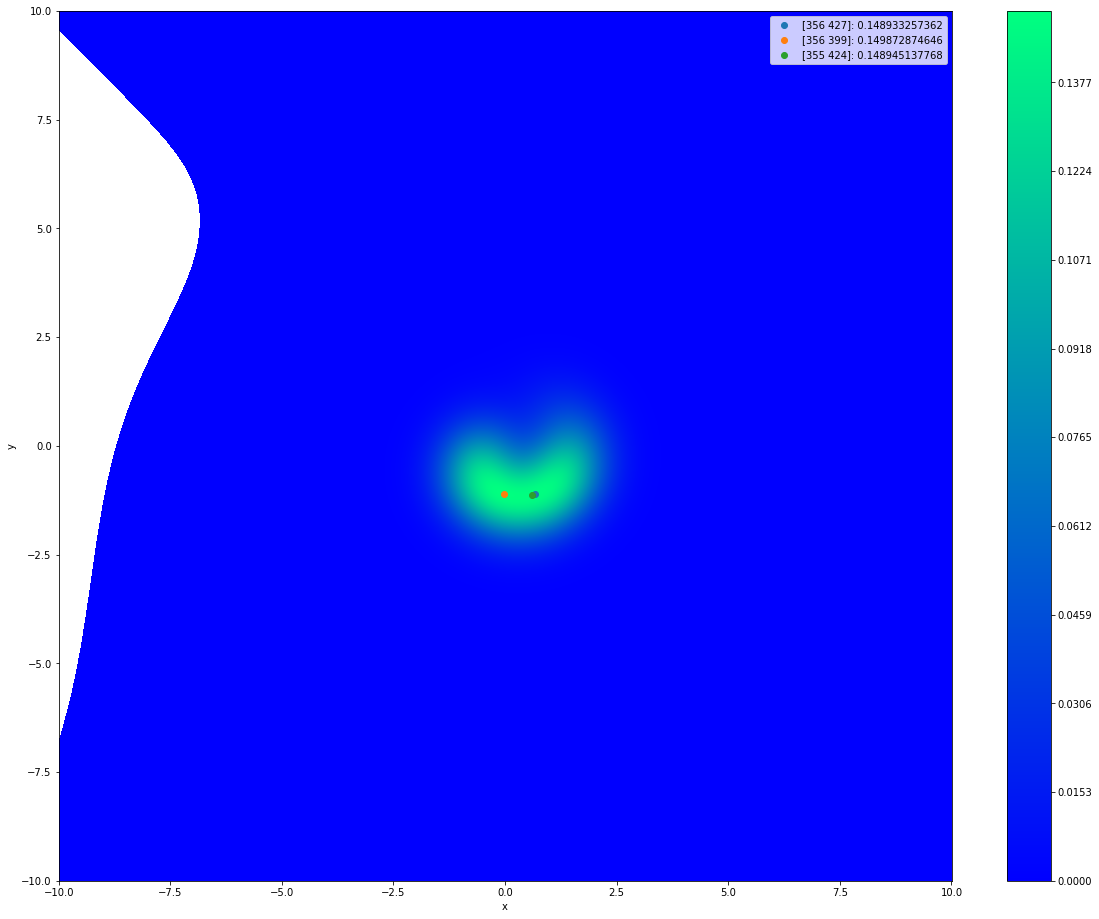

In [55]:
#samples = [[i for i in relevantInfo if len(i['peaks']) == 3][10]]
samples = [[i for i in relevantInfo if len(i['peaks']) == 3][10]]

for sample in samples:
    routine(sample['E'], sample['wd'])    

In [ ]:
doublePeaks = []

for a_i in relevantInfo:
    if len(a_i['peaks']) == 2:
        for b in a_i['peaks']:
            doublePeaks.append(b)
c = [i['peaks'][0] for i in relevantInfo if len(i['peaks']) == 1]
concacPeaks = np.sum([c, doublePeaks])

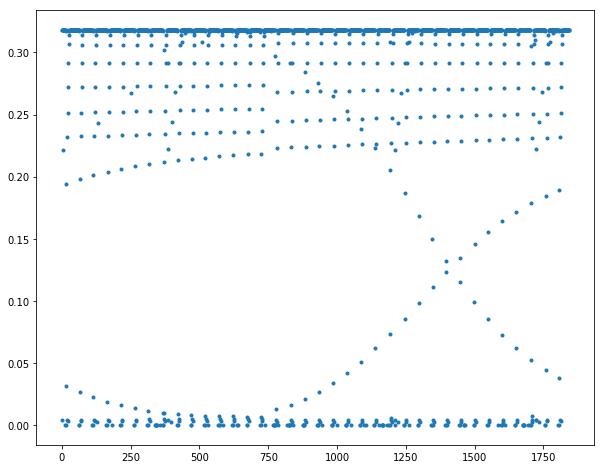

In [59]:
plt.plot(concacPeaks, '.')
plt.title('distribution of peak heights in data')
plt.ylabel('candidate peak heights')
plt.xlabel('arb index')
plt.axvline(x=len(c), color='k')
#plt.ylim(0.01,0.05)

In [ ]:
peaksTest = []
for relevantInfo_i in relevantInfo:
    for j in relevantInfo_i['peaks']:
        peaksTest.append(j)
    plt.plot(peaksTest, '.')
print(np.sum([j for j in peaksTest]))

In [84]:
#todo1: play with peaktrimlimit to affect width of leaf
#todo2: if 1 peak r = nothing? that might be the grey region

numIgnored = 0
plotData = []
peakTrimLimit = 0
biPeakLimit = 0.05#0.046
siPeakLimit = 9999999
singlePeakVals = []
for relevantInfo_i in relevantInfo:
    
    trimmedPeaks = []
    foundPeaks = relevantInfo_i['peaks']
    for foundPeak_i in foundPeaks:
        #if foundPeak_i > peakTrimLimit:
        trimmedPeaks.append(foundPeak_i)
    
    if len(trimmedPeaks) == 1:
#         r = 0
#         #singlePeakVals.append(trimmedPeaks[0])
#         if trimmedPeaks[0] > siPeakLimit:
#             plotData.append((relevantInfo_i['E'], relevantInfo_i['wd'], r))
        continue
    elif len(trimmedPeaks) == 2:
        #peak0 = relevantInfo_i['peaks'][0]
        #peak1 = relevantInfo_i['peaks'][1]
        peak0 = trimmedPeaks[0]
        peak1 = trimmedPeaks[1]
        if peak0 > biPeakLimit and peak1 > biPeakLimit:
            r = 1 - (abs(peak0-peak1)/(peak0+peak1))
            plotData.append((relevantInfo_i['E'], relevantInfo_i['wd'], r))
#         if r < 0.01:
#             print(peak0)
#             print(peak1)
#             print('bbbb')
#             break
#         if relevantInfo_i['wd'] < 0:
#             print(relevantInfo_i['wd'])
#             #print('aaaa')
#             break
        
    else:
        numIgnored += 1
        #print(relevantInfo_i['E'])
        #print(relevantInfo_i['wd'])
    #ignoreif more than 2 peaks
print(len(plotData))
print(len(trimmedPeaks))
print(numIgnored)
if len(plotData) == 0:
    print('NO BISTABILITY')

1600
0


In [ ]:
plotDataScaled = []
kappa = 0.0012 # 0.0012     
wc = 10.5665 # Cavity frequency/detuning 10.5665
for i in plotData:
    item = []
    item.append(i[0]/kappa)  
    item.append((i[1] - wc)/kappa)    
    item.append(i[2])
    plotDataScaled.append(item)

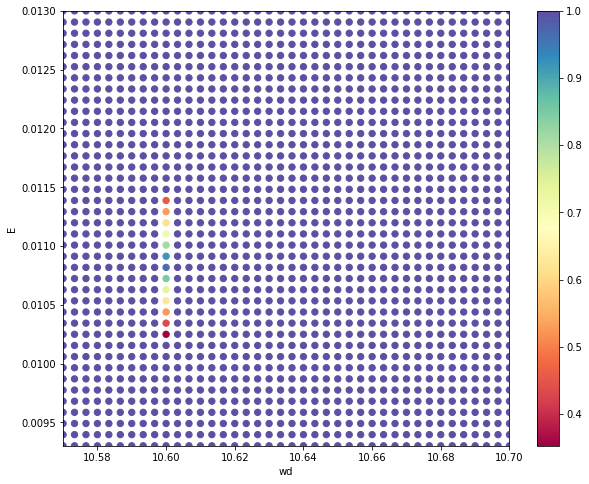

In [85]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

saveDir = 'peaks'
plt.scatter([i[1] for i in plotDataScaled], [i[0] for i in plotDataScaled], c=[i[2] for i in plotDataScaled], s=40, cmap=plt.cm.Spectral)
plt.ylabel(r"$E/\kappa$")
plt.xlabel(r"($\mathregular{w_{drive}}- \mathregular{w_{cavity}}) / \kappa$")
#plt.ylim(min([i[0] for i in plotData]), max([i[0] for i in plotData]))

plt.ylim((min([i[0] for i in plotDataScaled])), (max([i[0] for i in plotDataScaled])))
plt.xlim((min([i[1] for i in plotDataScaled])), (max([i[1] for i in plotDataScaled])))
#plt.ylim(0.00125,0.00150)
#plt.xlim(10.6095, 10.6109)
plt.colorbar()
print("EList = np.linspace(0.0,0.004,40)")
print("wdList = np.linspace(10.6,10.62,40)")

In [31]:
savedInfoTest = pickle.load(open(os.path.join(saveDir,'3.qpeak'), 'rb'))
print(savedInfoTest.keys())
print(savedInfoTest)

dict_keys(['E_i', 'wd_i', 'coors', 'peaks', 'Q3', 'xvec', 'yvec'])
{'E_i': 0.0092999999999999992, 'wd_i': 10.58, 'coors': array([[400, 389]], dtype=int64), 'peaks': array([[[  3.71981499e-42,   6.03714302e-42,   9.78587612e-42, ...,
           3.86383369e-46,   2.33972550e-46,   1.41393322e-46],
        [  3.46027758e-42,   5.61591545e-42,   9.10307879e-42, ...,
           4.96952922e-46,   3.03914073e-46,   1.85567570e-46]]]), 'Q3': array([[  1.27063246e-85,   2.06129774e-85,   3.33980115e-85, ...,
         -5.09309191e-87,  -3.21748216e-87,  -2.02921751e-87],
       [  2.09520430e-85,   3.39898621e-85,   5.50720856e-85, ...,
         -8.39814953e-87,  -5.30376654e-87,  -3.34401954e-87],
       [  3.45054122e-85,   5.59773654e-85,   9.06978057e-85, ...,
         -1.38264673e-86,  -8.72937698e-87,  -5.50230146e-87],
       ..., 
       [  2.69844315e-85,   4.37760420e-85,   7.09282702e-85, ...,
         -1.46887481e-86,  -9.26933073e-87,  -5.83999518e-87],
       [  1.63754064e-85,   2

In [ ]:
print(routine(savedInfoTest['E_i'],savedInfoTest['wd_i']))